# Table of content
1. Objective
2. Upload data
3. Process data
4. Analyse
4.1 Use stock price to calculate RSI
        - Case 30/70
        - Case 50/50
4.2 Use inflation to calculate RSI
        4.2.1 No-interpolation
                - Case 30/70
                - Case 50/50
                - Combine RSI_stock price and RSI Inflation (case 50/50): 
                        - Do not use inflation as lagging factor
                        - Use inflation as lagging factor

        4.2.2 Interpolation
                - Case 30/70
                - Case 50/50
                - Combine RSI_stock price and RSI Inflation (case 50/50):
                        - Do not use inflation as lagging factor
                        - Use inflation as lagging factor
5. Test

# 1. Object:

- Test the predictability of Relative Strength Index in Vietnam stock market
- Evaluate profitability of Relative Strength Index in obtaining stock returns using inflation as an new parameter to calculate Relative Strength Index
*monthly inflation data is converted to daily inflation by two methods (keep same value for whole month and mlinear interpolation)

# 2. Upload data

In [177]:
import pandas as pd
import numpy as np          
import decimal
import datetime 
import matplotlib.pyplot as plt

In [178]:
df_stock_price= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Stock data.csv')

In [179]:
df_inflation= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/inflation data.csv')

In [180]:
df_stock_price = df_stock_price[['Date', 'StockPrice', 'Trading days']]

In [181]:
df_inflation = df_inflation[['Date_inf', 'Inflation_variation']]

In [182]:
df_stock_price

Date StockPrice  Trading days
0     02/01/2009     313.34             1
1     05/01/2009     311.91             2
2     06/01/2009     314.04             3
3     07/01/2009     319.58             4
4     08/01/2009     314.15             5
...          ...        ...           ...
3361  24/06/2022   1,185.48          3362
3362  27/06/2022   1,202.82          3363
3363  28/06/2022   1,218.10          3364
3364  29/06/2022   1,218.09          3365
3365  30/06/2022   1,197.60          3366

[3366 rows x 3 columns]

In [183]:
print(df_stock_price.dtypes)

Date            object
StockPrice      object
Trading days     int64
dtype: object


In [184]:
df_inflation

Date_inf  Inflation_variation
0    01/01/2009                 0.32
1    01/02/2009                 1.17
2    01/03/2009                -0.17
3    01/04/2009                 0.35
4    01/05/2009                 0.44
..          ...                  ...
157  01/02/2022                 1.00
158  01/03/2022                 0.70
159  01/04/2022                 0.18
160  01/05/2022                 0.38
161  01/06/2022                 0.69

[162 rows x 2 columns]

In [185]:
print(df_inflation.dtypes)

Date_inf                object
Inflation_variation    float64
dtype: object


# 3. Process Data

In [186]:
#change format of date to '%d/%m/%Y'
df_stock_price["Date"]=pd.to_datetime(df_stock_price["Date"].astype(str), format='%d/%m/%Y')


In [187]:
#change format of date to '%d/%m/%Y'
df_inflation["Date_inf"]=pd.to_datetime(df_inflation["Date_inf"].astype(str), format='%d/%m/%Y')

In [188]:
#change data type from string to dateitme
df_stock_price["Date"] = pd.to_datetime(df_stock_price["Date"])

In [189]:
#change data type from string to datetime
df_inflation["Date_inf"] = pd.to_datetime(df_inflation["Date_inf"])

In [190]:
#change data type from string to datetime
df_stock_price["Date"] = df_stock_price["Date"].astype('datetime64[ns]')

In [191]:
df_inflation["Date_inf"] = df_inflation["Date_inf"].astype('datetime64[ns]')

In [192]:
#change '' in column "StockPrice" to 0.00
df_stock_price['StockPrice']=df_stock_price['StockPrice'].str.replace(',','').replace('','0.00')

In [193]:
df_stock_price['StockPrice'] = df_stock_price['StockPrice'].astype(float)

In [194]:
df_stock_price.describe()

Date   StockPrice  Trading days
count                           3366  3366.000000    3366.00000
mean   2015-10-04 00:22:40.427807232   717.793357    1683.50000
min              2009-01-02 00:00:00   235.500000       1.00000
25%              2012-05-22 06:00:00   487.152500     842.25000
50%              2015-10-07 12:00:00   598.380000    1683.50000
75%              2019-02-19 18:00:00   949.937500    2524.75000
max              2022-06-30 00:00:00  1528.570000    3366.00000
std                              NaN   301.391495     971.82483

In [195]:
df_inflation.describe()

Date_inf  Inflation_variation
count                            162           162.000000
mean   2015-09-16 03:42:13.333333248             0.436975
min              2009-01-01 00:00:00            -1.540000
25%              2012-05-08 18:00:00             0.080000
50%              2015-09-16 00:00:00             0.320000
75%              2019-01-24 06:00:00             0.627500
max              2022-06-01 00:00:00             3.320000
std                              NaN             0.632395

In [196]:
print(df_stock_price.dtypes)

Date            datetime64[ns]
StockPrice             float64
Trading days             int64
dtype: object


In [197]:
df_stock_price

Date  StockPrice  Trading days
0    2009-01-02      313.34             1
1    2009-01-05      311.91             2
2    2009-01-06      314.04             3
3    2009-01-07      319.58             4
4    2009-01-08      314.15             5
...         ...         ...           ...
3361 2022-06-24     1185.48          3362
3362 2022-06-27     1202.82          3363
3363 2022-06-28     1218.10          3364
3364 2022-06-29     1218.09          3365
3365 2022-06-30     1197.60          3366

[3366 rows x 3 columns]

# 4. Analyse
4.1 Use stock price to calculate RSI 

In [198]:
import ta


# calculate the RSI using ta library
df_stock_price['RSI_sp'] = ta.momentum.RSIIndicator(df_stock_price['StockPrice'], window=14).rsi()

# print the RSI values
print(df_stock_price['RSI_sp'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3361    35.370958
3362    40.420868
3363    44.533727
3364    44.531560
3365    40.214401
Name: RSI_sp, Length: 3366, dtype: float64


In [199]:
df_stock_price

Date  StockPrice  Trading days     RSI_sp
0    2009-01-02      313.34             1        NaN
1    2009-01-05      311.91             2        NaN
2    2009-01-06      314.04             3        NaN
3    2009-01-07      319.58             4        NaN
4    2009-01-08      314.15             5        NaN
...         ...         ...           ...        ...
3361 2022-06-24     1185.48          3362  35.370958
3362 2022-06-27     1202.82          3363  40.420868
3363 2022-06-28     1218.10          3364  44.533727
3364 2022-06-29     1218.09          3365  44.531560
3365 2022-06-30     1197.60          3366  40.214401

[3366 rows x 4 columns]

Combine stock price and RSI in one line chart

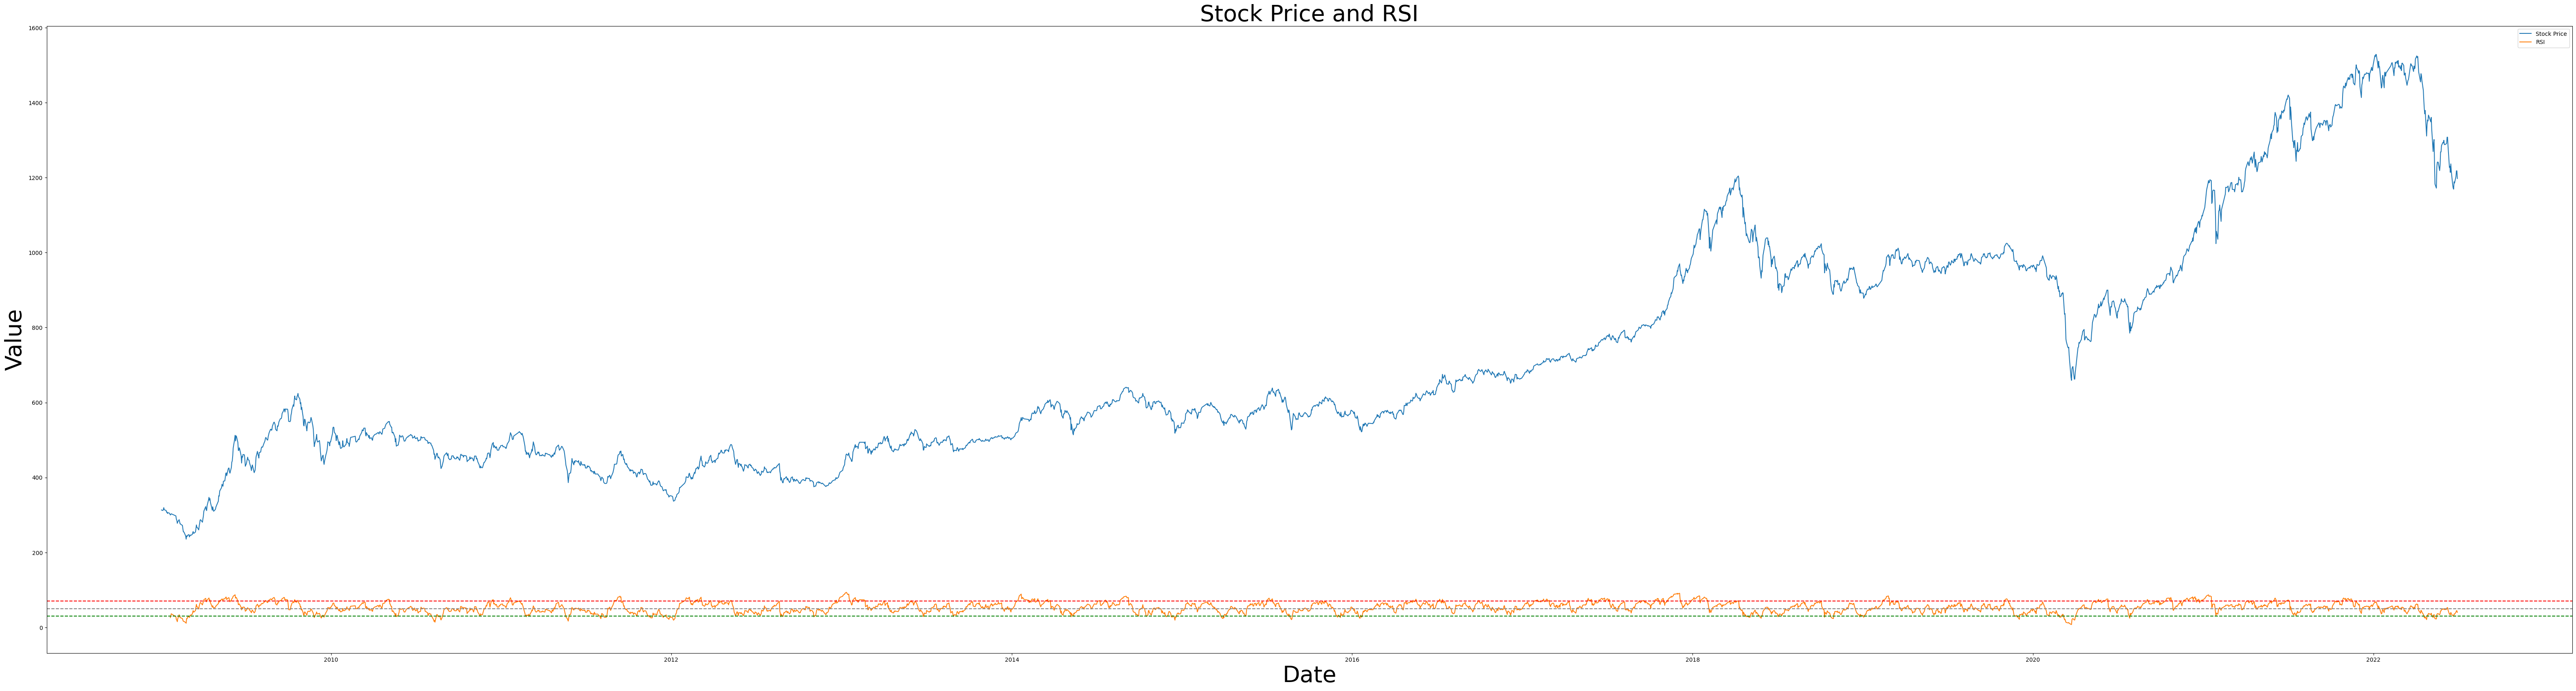

In [200]:

# Create a new figure
fig, ax = plt.subplots(figsize=(80, 20))

# Plot the first line chart
ax.plot(df_stock_price['Date'], df_stock_price['StockPrice'], label='Stock Price')

# Plot the second line chart

ax.plot(df_stock_price['Date'], df_stock_price['RSI_sp'], label='RSI')

# Set the title and labels for the chart
plt.title('Stock Price and RSI',fontsize = 40)
plt.xlabel('Date',fontsize = 40)
plt.ylabel('Value',fontsize = 40)
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
# Show the legend and plot the chart
plt.legend()
plt.show()


create a Stock price line chart

Text(0, 0.5, 'Stock price')

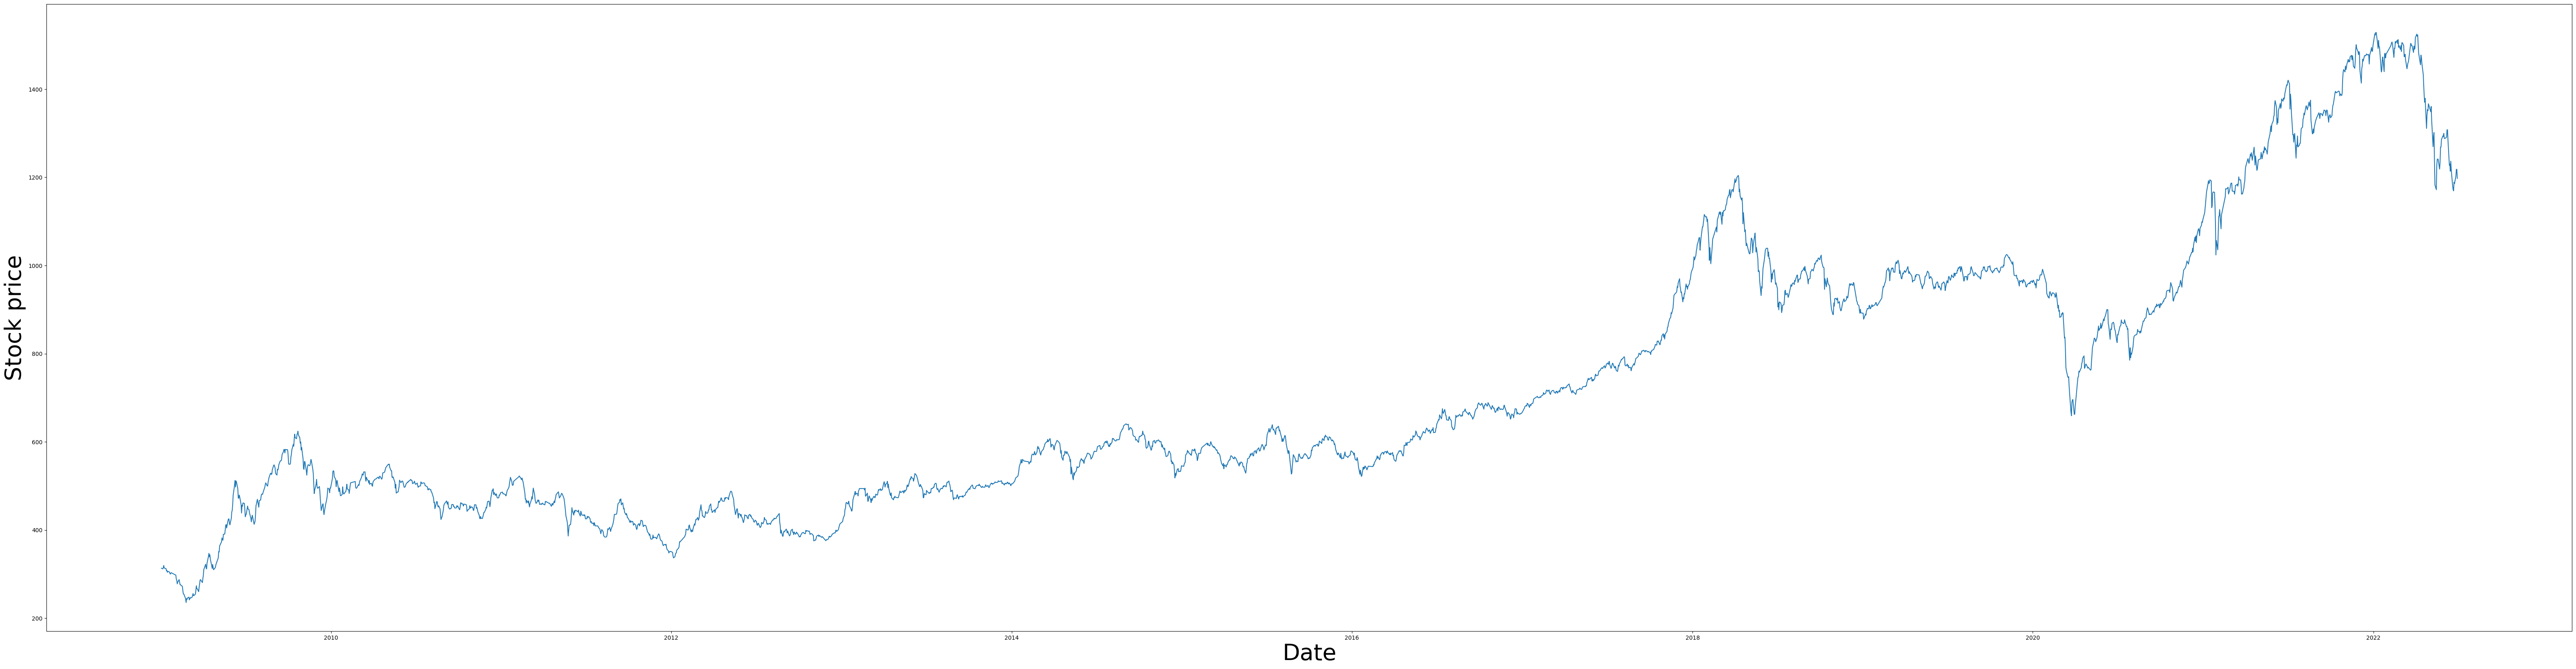

In [201]:

fig = plt.figure(figsize=(80, 20))
plt.plot(df_stock_price['Date'], df_stock_price['StockPrice'])
# add labels and a title
plt.xlabel('Date',  fontsize=40)
plt.ylabel('Stock price',  fontsize=40)


Create a RSI_using_stock_price line chart 

Text(0.5, 1.0, 'RSI_stock_price')

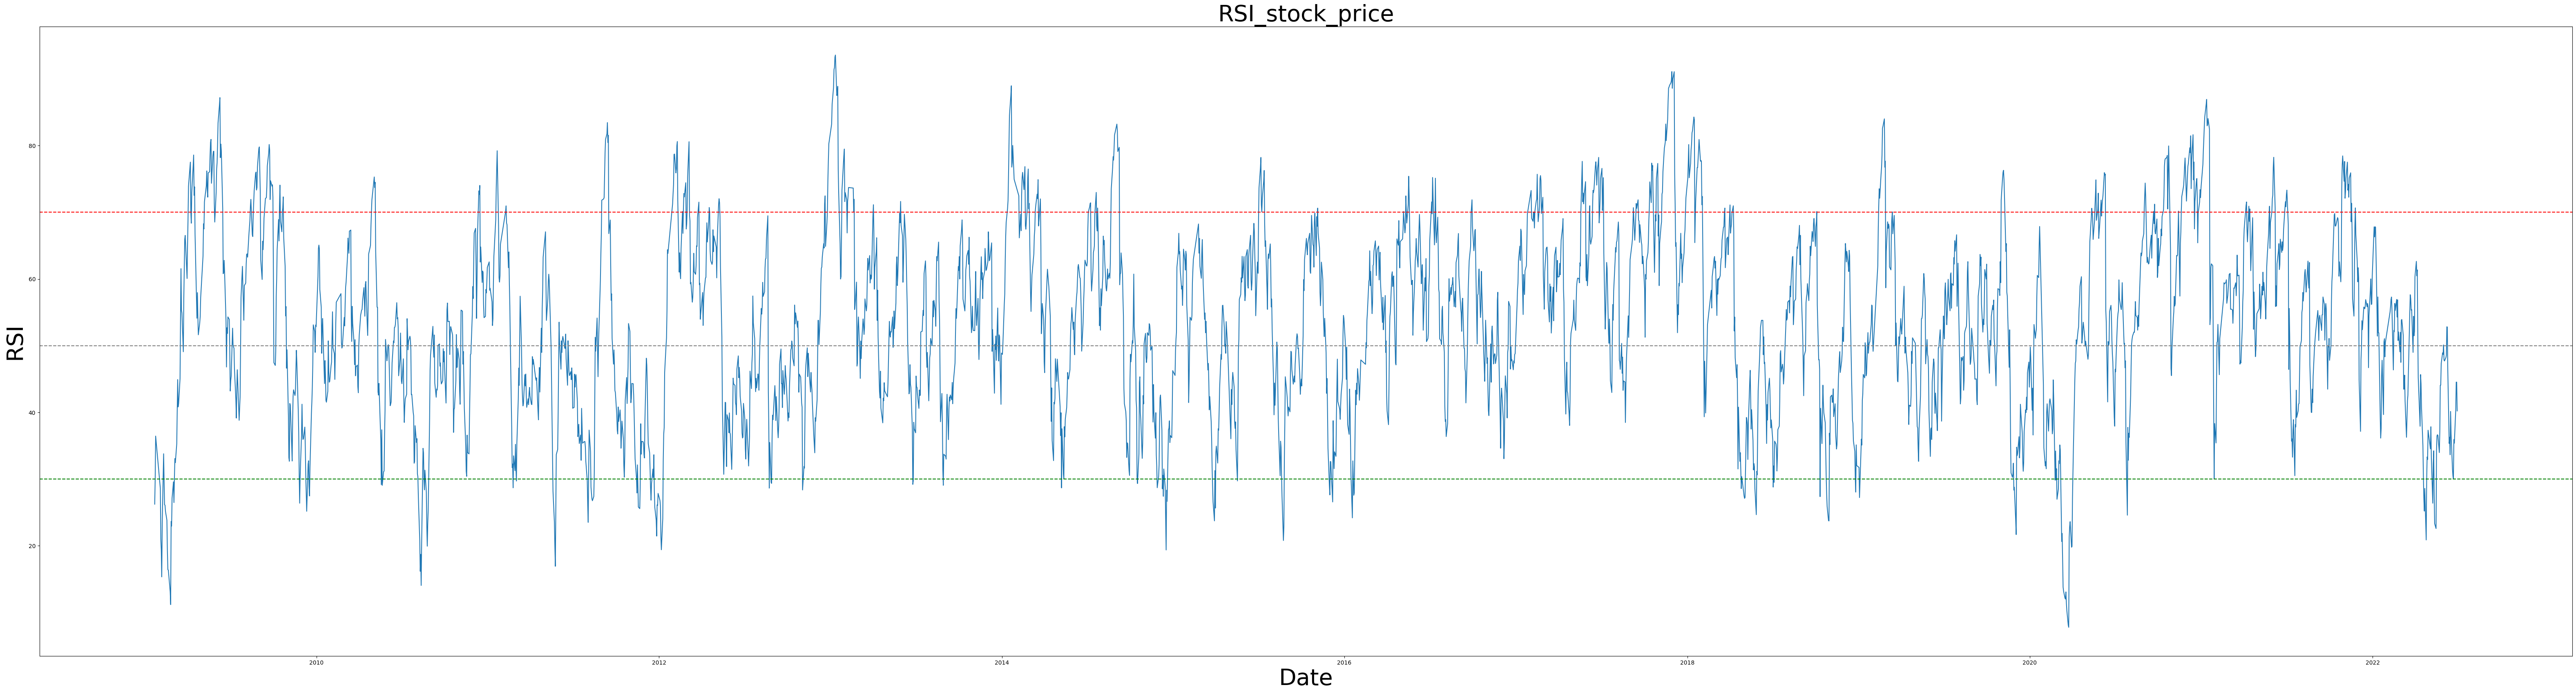

In [202]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(80, 20))
plt.plot(df_stock_price['Date'], df_stock_price['RSI_sp'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=40)
plt.ylabel('RSI',  fontsize=40)
plt.title('RSI_stock_price',  fontsize=40)

In [203]:
print(df_inflation.dtypes)

Date_inf               datetime64[ns]
Inflation_variation           float64
dtype: object


# Use stock price to calculate RSI and find buy/sell signal Case 30%-70%

In [204]:
df_stock_price

Date  StockPrice  Trading days     RSI_sp
0    2009-01-02      313.34             1        NaN
1    2009-01-05      311.91             2        NaN
2    2009-01-06      314.04             3        NaN
3    2009-01-07      319.58             4        NaN
4    2009-01-08      314.15             5        NaN
...         ...         ...           ...        ...
3361 2022-06-24     1185.48          3362  35.370958
3362 2022-06-27     1202.82          3363  40.420868
3363 2022-06-28     1218.10          3364  44.533727
3364 2022-06-29     1218.09          3365  44.531560
3365 2022-06-30     1197.60          3366  40.214401

[3366 rows x 4 columns]

In [205]:
#Using flag to create Buy/Sell signal for case 30/70
flag = False
def check_signal(df_stock_price):
    global flag
    if (df_stock_price['RSI_sp'] > 30) & (df_stock_price['prev_rsi'] < 30) and not flag:  
        flag = True
        return "BUY"
    elif (df_stock_price['RSI_sp'] < 70) & (df_stock_price['prev_rsi'] > 70) and flag: 
        flag = False
        return "SELL"
    else:
        return "HOLD"
df_stock_price['prev_rsi'] = df_stock_price['RSI_sp'].shift(1)
df_stock_price['signal'] = df_stock_price.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_sp_3070_signal = df_stock_price[(df_stock_price['signal'] == 'BUY') | (df_stock_price['signal'] == 'SELL')]
print(RSI_sp_3070_signal)

           Date  StockPrice  Trading days     RSI_sp   prev_rsi signal
15   2009-01-23      303.21            16  36.440770  29.884428    BUY
63   2009-04-09      311.72            64  68.358961  70.042413   SELL
226  2009-11-27      490.62           227  30.397630  26.380762    BUY
332  2010-05-07      542.03           333  64.229283  74.487591   SELL
341  2010-05-20      503.55           342  37.384470  29.170905    BUY
489  2010-12-16      480.21           490  62.536260  74.023873   SELL
533  2011-02-25      466.96           534  33.486604  28.688988    BUY
673  2011-09-16      457.11           674  66.796469  81.540603   SELL
716  2011-11-16      390.89           717  32.126254  27.913350    BUY
773  2012-02-13      395.54           774  61.025678  71.759883   SELL
909  2012-08-24      399.72           910  35.487091  28.644219    BUY
993  2012-12-21      396.78           994  64.886593  72.460099   SELL
1116 2013-06-27      482.95          1117  38.514995  29.714151    BUY
1268 2

In [206]:
RSI_sp_3070_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 15 to 3321
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          31 non-null     datetime64[ns]
 1   StockPrice    31 non-null     float64       
 2   Trading days  31 non-null     int64         
 3   RSI_sp        31 non-null     float64       
 4   prev_rsi      31 non-null     float64       
 5   signal        31 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [207]:
count = df_stock_price['signal'].value_counts()
print(count)

signal
HOLD    3335
BUY       16
SELL      15
Name: count, dtype: int64


In [208]:
#Export to excel file
filename = 'RSI_sp_3070_signal.xlsx'
RSI_sp_3070_signal.to_excel(filename, index=False)

# Use stock price to calculate RSI and find buy/sell signal Case 50%-50%

In [209]:
#Using flag to create Buy/Sell signal for case 50/50
flag = False
def check_signal(df_stock_price):
    global flag
    if (df_stock_price['RSI_sp'] > 50) & (df_stock_price['prev_rsi'] < 50) and not flag:  
        flag = True
        return "BUY"
    elif (df_stock_price['RSI_sp'] < 50) & (df_stock_price['prev_rsi'] > 50) and flag:  
        flag = False
        return "SELL"
    else:
        return "HOLD"
df_stock_price['prev_rsi'] = df_stock_price['RSI_sp'].shift(1)
df_stock_price['signal'] = df_stock_price.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_sp_5050_signal = df_stock_price[(df_stock_price['signal'] == 'BUY') | (df_stock_price['signal'] == 'SELL')]
print(RSI_sp_5050_signal)

           Date  StockPrice  Trading days     RSI_sp   prev_rsi signal
47   2009-03-17      263.20            48  53.780522  45.044343    BUY
51   2009-03-23      260.16            52  49.087468  54.913199   SELL
52   2009-03-24      270.62            53  57.035619  49.087468    BUY
114  2009-06-23      438.55           115  46.798119  53.664259   SELL
115  2009-06-24      456.22           116  52.687333  46.798119    BUY
...         ...         ...           ...        ...        ...    ...
3309 2022-04-08     1482.00          3310  45.207895  52.312801   SELL
3344 2022-06-01     1299.52          3345  50.101885  48.689618    BUY
3345 2022-06-02     1288.62          3346  47.842052  50.101885   SELL
3349 2022-06-08     1307.91          3350  52.825783  48.560931    BUY
3351 2022-06-10     1284.08          3352  46.406591  52.794471   SELL

[298 rows x 6 columns]


In [210]:
RSI_sp_5050_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 47 to 3351
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          298 non-null    datetime64[ns]
 1   StockPrice    298 non-null    float64       
 2   Trading days  298 non-null    int64         
 3   RSI_sp        298 non-null    float64       
 4   prev_rsi      298 non-null    float64       
 5   signal        298 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [211]:
count = RSI_sp_5050_signal['signal'].value_counts()
print(count)

signal
BUY     149
SELL    149
Name: count, dtype: int64


In [212]:
#Export to excel file
filename = 'RSI_sp_5050_signal.xlsx'
RSI_sp_5050_signal.to_excel(filename, index=False)

# 4.2 Using daily inflation to calculate RSI
4.2.1 No-interpolation

In [213]:
df_inflation_daily= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/inflation_daily_data.csv')

In [214]:
df_inflation_daily

Date_inf  Inflation_variation
0     2009-01-01                 0.32
1     2009-01-02                 0.32
2     2009-01-03                 0.32
3     2009-01-04                 0.32
4     2009-01-05                 0.32
...          ...                  ...
4924  2022-06-26                 0.69
4925  2022-06-27                 0.69
4926  2022-06-28                 0.69
4927  2022-06-29                 0.69
4928  2022-06-30                 0.69

[4929 rows x 2 columns]

In [215]:
#change data type from string to datetime
df_inflation_daily["Date_inf"] = df_inflation_daily["Date_inf"].astype('datetime64[ns]')

In [216]:
df_inflation_daily

Date_inf  Inflation_variation
0    2009-01-01                 0.32
1    2009-01-02                 0.32
2    2009-01-03                 0.32
3    2009-01-04                 0.32
4    2009-01-05                 0.32
...         ...                  ...
4924 2022-06-26                 0.69
4925 2022-06-27                 0.69
4926 2022-06-28                 0.69
4927 2022-06-29                 0.69
4928 2022-06-30                 0.69

[4929 rows x 2 columns]

In [217]:
df_inflation_daily['gain'] = df_inflation_daily['Inflation_variation'].clip(lower=0).round(2)
df_inflation_daily['loss'] = df_inflation_daily['Inflation_variation'].clip(upper=0).abs().round(2)


In [218]:
window_length = 14
# Get initial Averages
df_inflation_daily['avg_gain'] = df_inflation_daily['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
df_inflation_daily['avg_loss'] = df_inflation_daily['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
# View Result
print(df_inflation_daily)
# View first SMA value
print(df_inflation_daily.iloc[window_length-1: window_length+2])


       Date_inf  Inflation_variation  gain  loss  avg_gain  avg_loss
0    2009-01-01                 0.32  0.32   0.0       NaN       NaN
1    2009-01-02                 0.32  0.32   0.0       NaN       NaN
2    2009-01-03                 0.32  0.32   0.0       NaN       NaN
3    2009-01-04                 0.32  0.32   0.0       NaN       NaN
4    2009-01-05                 0.32  0.32   0.0       NaN       NaN
...         ...                  ...   ...   ...       ...       ...
4924 2022-06-26                 0.69  0.69   0.0       NaN       NaN
4925 2022-06-27                 0.69  0.69   0.0       NaN       NaN
4926 2022-06-28                 0.69  0.69   0.0       NaN       NaN
4927 2022-06-29                 0.69  0.69   0.0       NaN       NaN
4928 2022-06-30                 0.69  0.69   0.0       NaN       NaN

[4929 rows x 6 columns]
     Date_inf  Inflation_variation  gain  loss  avg_gain  avg_loss
13 2009-01-14                 0.32  0.32   0.0      0.32       0.0
14 2009-01-15

In [219]:
for i, row in enumerate(df_inflation_daily['avg_gain'].iloc[window_length+1:]):
    df_inflation_daily['avg_gain'].iloc[i + window_length + 1] =\
        (df_inflation_daily['avg_gain'].iloc[i + window_length] *
         (window_length - 1) +
         df_inflation_daily['gain'].iloc[i + window_length + 1])\
        / window_length
# Average Losses
for i, row in enumerate(df_inflation_daily['avg_loss'].iloc[window_length+1:]):
    df_inflation_daily['avg_loss'].iloc[i + window_length + 1] =\
        (df_inflation_daily['avg_loss'].iloc[i + window_length] *
         (window_length - 1) +
         df_inflation_daily['loss'].iloc[i + window_length + 1])\
        / window_length
# View initial results
print(df_inflation_daily[window_length-1:window_length+5])

     Date_inf  Inflation_variation  gain  loss  avg_gain  avg_loss
13 2009-01-14                 0.32  0.32   0.0      0.32       0.0
14 2009-01-15                 0.32  0.32   0.0      0.32       0.0
15 2009-01-16                 0.32  0.32   0.0      0.32       0.0
16 2009-01-17                 0.32  0.32   0.0      0.32       0.0
17 2009-01-18                 0.32  0.32   0.0      0.32       0.0
18 2009-01-19                 0.32  0.32   0.0      0.32       0.0


/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/3864312534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inflation_daily['avg_gain'].iloc[i + window_length + 1] =\
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/3864312534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inflation_daily['avg_gain'].iloc[i + window_length + 1] =\
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/3864312534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [220]:
# Calculate RS Values
df_inflation_daily['RS'] = df_inflation_daily['avg_gain'] / df_inflation_daily['avg_loss']

In [221]:
# Calculate RSI
df_inflation_daily['RSI_in'] = 100 - (100 / (1.0 + df_inflation_daily['RS']))
print(df_inflation_daily)

       Date_inf  Inflation_variation  gain  loss  avg_gain      avg_loss   
0    2009-01-01                 0.32  0.32   0.0       NaN           NaN  \
1    2009-01-02                 0.32  0.32   0.0       NaN           NaN   
2    2009-01-03                 0.32  0.32   0.0       NaN           NaN   
3    2009-01-04                 0.32  0.32   0.0       NaN           NaN   
4    2009-01-05                 0.32  0.32   0.0       NaN           NaN   
...         ...                  ...   ...   ...       ...           ...   
4924 2022-06-26                 0.69  0.69   0.0  0.642788  3.306683e-07   
4925 2022-06-27                 0.69  0.69   0.0  0.646160  3.070491e-07   
4926 2022-06-28                 0.69  0.69   0.0  0.649292  2.851171e-07   
4927 2022-06-29                 0.69  0.69   0.0  0.652199  2.647516e-07   
4928 2022-06-30                 0.69  0.69   0.0  0.654899  2.458407e-07   

                RS     RSI_in  
0              NaN        NaN  
1              NaN     

Text(0.5, 1.0, 'RSI_using_inflation_daily')

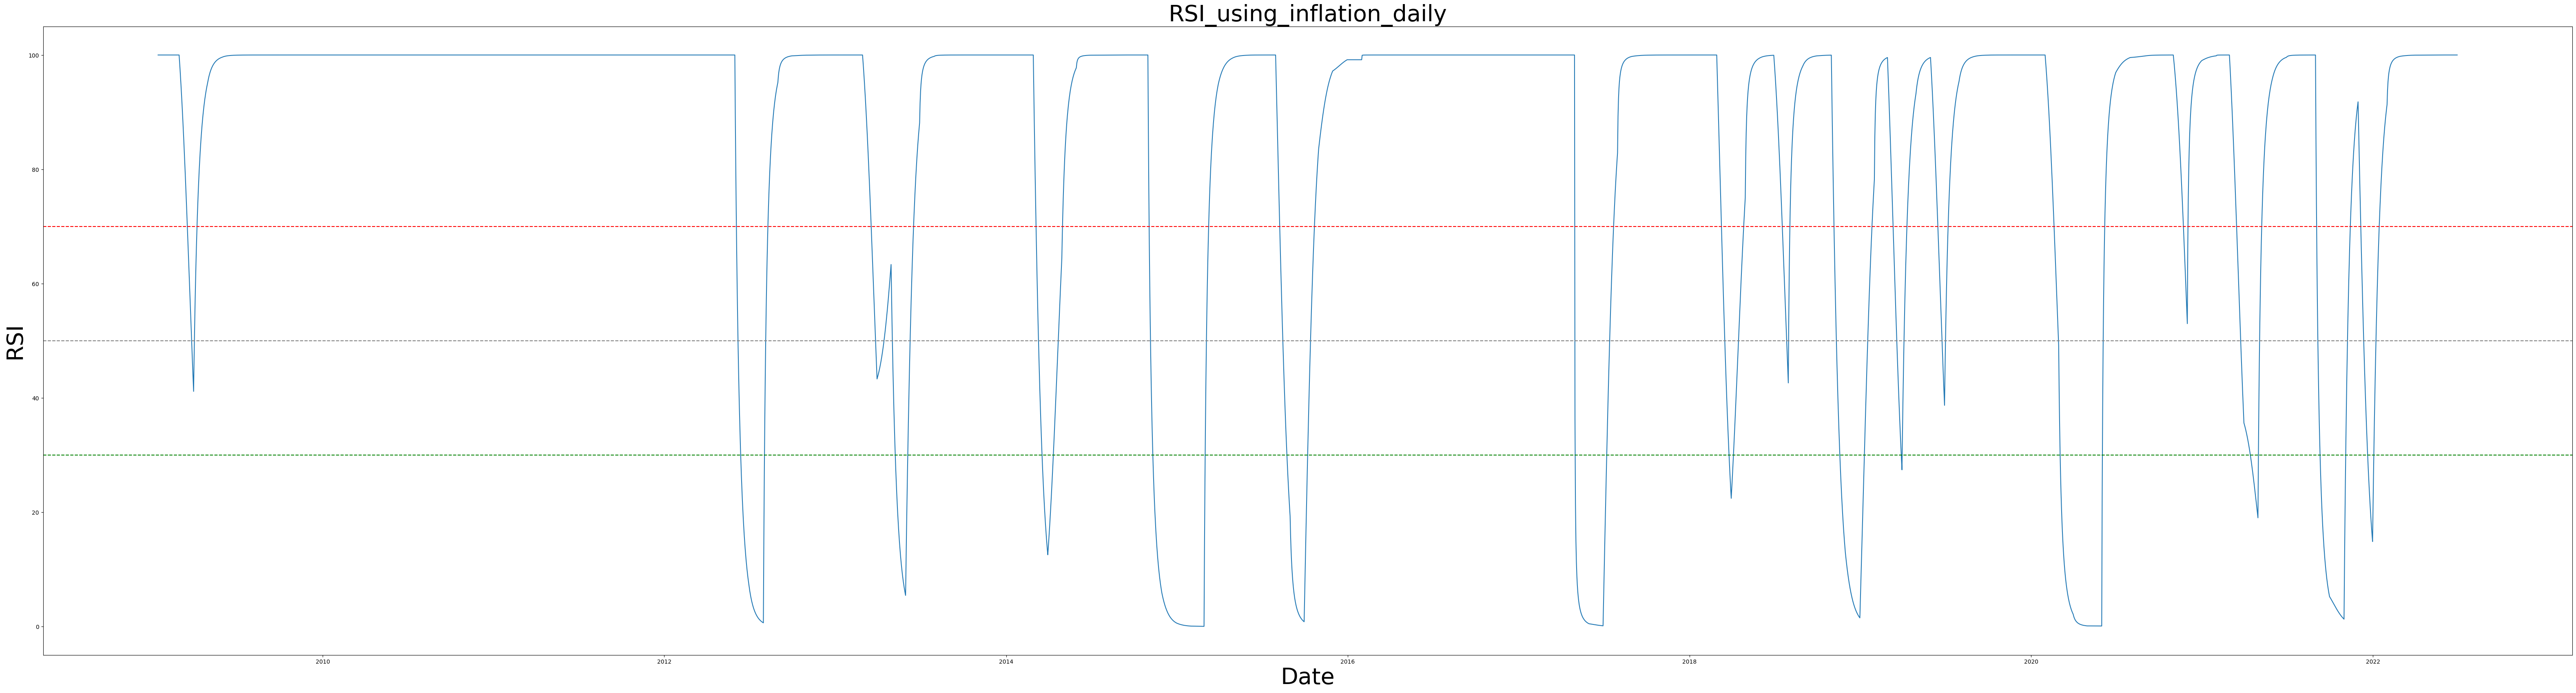

In [222]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(80, 20))
plt.plot(df_inflation_daily['Date_inf'], df_inflation_daily['RSI_in'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=40)
plt.ylabel('RSI',  fontsize=40)
plt.title('RSI_using_inflation_daily',  fontsize=40)

In [223]:
df_inflation_daily = df_inflation_daily[['Date_inf', 'RSI_in']]
df_inflation_daily

Date_inf     RSI_in
0    2009-01-01        NaN
1    2009-01-02        NaN
2    2009-01-03        NaN
3    2009-01-04        NaN
4    2009-01-05        NaN
...         ...        ...
4924 2022-06-26  99.999949
4925 2022-06-27  99.999952
4926 2022-06-28  99.999956
4927 2022-06-29  99.999959
4928 2022-06-30  99.999962

[4929 rows x 2 columns]

In [224]:
df_stock_price = df_stock_price[['Date', 'StockPrice', 'Trading days','RSI_sp']]
df_stock_price

Date  StockPrice  Trading days     RSI_sp
0    2009-01-02      313.34             1        NaN
1    2009-01-05      311.91             2        NaN
2    2009-01-06      314.04             3        NaN
3    2009-01-07      319.58             4        NaN
4    2009-01-08      314.15             5        NaN
...         ...         ...           ...        ...
3361 2022-06-24     1185.48          3362  35.370958
3362 2022-06-27     1202.82          3363  40.420868
3363 2022-06-28     1218.10          3364  44.533727
3364 2022-06-29     1218.09          3365  44.531560
3365 2022-06-30     1197.60          3366  40.214401

[3366 rows x 4 columns]

In [225]:
inf_sp_no_interpolation = pd.merge(df_stock_price, df_inflation_daily, left_on='Date', right_on='Date_inf', how='left')
inf_sp_no_interpolation

Date  StockPrice  Trading days     RSI_sp   Date_inf     RSI_in
0    2009-01-02      313.34             1        NaN 2009-01-02        NaN
1    2009-01-05      311.91             2        NaN 2009-01-05        NaN
2    2009-01-06      314.04             3        NaN 2009-01-06        NaN
3    2009-01-07      319.58             4        NaN 2009-01-07        NaN
4    2009-01-08      314.15             5        NaN 2009-01-08        NaN
...         ...         ...           ...        ...        ...        ...
3361 2022-06-24     1185.48          3362  35.370958 2022-06-24  99.999940
3362 2022-06-27     1202.82          3363  40.420868 2022-06-27  99.999952
3363 2022-06-28     1218.10          3364  44.533727 2022-06-28  99.999956
3364 2022-06-29     1218.09          3365  44.531560 2022-06-29  99.999959
3365 2022-06-30     1197.60          3366  40.214401 2022-06-30  99.999962

[3366 rows x 6 columns]

# Use daily inflation to calculate RSI and find buy/sell signal Case 30%/70%

In [226]:
#Using flag to create Buy/Sell signal for case 30/70
flag = False
def check_signal(inf_sp_no_interpolation):
    global flag
    if (inf_sp_no_interpolation['RSI_in'] > 30) & (inf_sp_no_interpolation['prev_rsi'] < 30) and not flag:  
        flag = True
        return "BUY"
    elif (inf_sp_no_interpolation['RSI_in'] < 70) & (inf_sp_no_interpolation['prev_rsi'] > 70) and flag: 
        flag = False
        return "SELL"
    else:
        return "HOLD"
inf_sp_no_interpolation['prev_rsi'] = inf_sp_no_interpolation['RSI_in'].shift(1)
inf_sp_no_interpolation['signal'] = inf_sp_no_interpolation.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_in_3070_signal = inf_sp_no_interpolation[(inf_sp_no_interpolation['signal'] == 'BUY') | (inf_sp_no_interpolation['signal'] == 'SELL')]
print(RSI_in_3070_signal)

           Date  StockPrice  Trading days     RSI_sp   Date_inf     RSI_in   
894  2012-08-03      418.21           895  50.229488 2012-08-03  35.835432  \
1048 2013-03-19      480.48          1049  56.117282 2013-03-19  68.888992   
1100 2013-06-05      514.64          1101  62.163825 2013-06-05  31.472291   
1287 2014-03-06      578.56          1288  60.614045 2014-03-06  69.639387   
1313 2014-04-14      596.11          1314  54.452952 2014-04-14  33.856879   
1453 2014-11-03      603.15          1454  51.841401 2014-11-03  67.134311   
1531 2015-03-03      596.72          1532  63.813764 2015-03-03  35.017626   
1641 2015-08-10      614.53          1642  50.538970 2015-08-10  66.119545   
1683 2015-10-08      586.78          1684  62.897970 2015-10-08  31.834667   
2073 2017-05-03      719.54          2074  53.994484 2017-05-03  14.973620   
2121 2017-07-10      766.56          2122  52.490089 2017-07-10  37.332667   
2288 2018-03-12     1126.29          2289  60.470869 2018-03-12 

In [227]:
RSI_in_3070_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 894 to 3246
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          23 non-null     datetime64[ns]
 1   StockPrice    23 non-null     float64       
 2   Trading days  23 non-null     int64         
 3   RSI_sp        23 non-null     float64       
 4   Date_inf      23 non-null     datetime64[ns]
 5   RSI_in        23 non-null     float64       
 6   prev_rsi      23 non-null     float64       
 7   signal        23 non-null     object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 1.6+ KB


In [228]:
count = RSI_in_3070_signal['signal'].value_counts()
print(count)

signal
BUY     12
SELL    11
Name: count, dtype: int64


In [229]:
#Export to excel file
filename = 'RSI_in_3070_signal.xlsx'
RSI_in_3070_signal.to_excel(filename, index=False)

# Use daily inflation to calculate RSI and find buy/sell signal Case 50%/50%

In [230]:
#Using flag to create Buy/Sell signal for case 50/50
flag = False
def check_signal(inf_sp_no_interpolation):
    global flag
    if (inf_sp_no_interpolation['RSI_in'] > 50) & (inf_sp_no_interpolation['prev_rsi'] < 50) and not flag:  
        flag = True
        return "BUY"
    elif (inf_sp_no_interpolation['RSI_in'] < 50) & (inf_sp_no_interpolation['prev_rsi'] > 50) and flag: 
        flag = False
        return "SELL"
    else:
        return "HOLD"
inf_sp_no_interpolation['prev_rsi'] = inf_sp_no_interpolation['RSI_in'].shift(1)
inf_sp_no_interpolation['signal'] = inf_sp_no_interpolation.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_in_5050_signal = inf_sp_no_interpolation[(inf_sp_no_interpolation['signal'] == 'BUY') | (inf_sp_no_interpolation['signal'] == 'SELL')]
print(RSI_in_5050_signal)

           Date  StockPrice  Trading days     RSI_sp   Date_inf     RSI_in   
59   2009-04-02      297.30            60  68.857583 2009-04-02  51.566732  \
853  2012-06-07      434.41           854  45.130461 2012-06-07  48.933472   
895  2012-08-06      423.16           896  55.572871 2012-08-06  55.514694   
1055 2013-03-28      490.67          1056  59.978728 2013-03-28  49.539851   
1067 2013-04-15      480.02          1068  43.138330 2013-04-15  50.070709   
1077 2013-05-03      475.24          1078  44.185662 2013-05-03  48.878921   
1103 2013-06-10      524.56          1104  65.951548 2013-06-10  51.007334   
1291 2014-03-12      590.02          1292  67.352361 2014-03-12  47.257756   
1320 2014-04-23      569.36          1321  41.256578 2014-04-23  51.287643   
1456 2014-11-06      597.85          1457  48.156238 2014-11-06  47.596641   
1534 2015-03-06      593.97          1535  59.224775 2015-03-06  54.783576   
1646 2015-08-17      573.15          1647  30.499402 2015-08-17 

In [231]:
RSI_in_5050_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 59 to 3250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          33 non-null     datetime64[ns]
 1   StockPrice    33 non-null     float64       
 2   Trading days  33 non-null     int64         
 3   RSI_sp        33 non-null     float64       
 4   Date_inf      33 non-null     datetime64[ns]
 5   RSI_in        33 non-null     float64       
 6   prev_rsi      33 non-null     float64       
 7   signal        33 non-null     object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 2.3+ KB


In [232]:
count = RSI_in_5050_signal['signal'].value_counts()
print(count)

signal
BUY     17
SELL    16
Name: count, dtype: int64


In [233]:
#Export to excel file
filename = 'RSI_in_5050_signal.xlsx'
RSI_in_5050_signal.to_excel(filename, index=False)

# Combine Inflation and Stock price
Do not use inflation as lagging factor

# INSIGHT: Do not use inflation as lagging factor can not create any buy/sell signals

In [234]:
inf_sp_no_interpolation = inf_sp_no_interpolation.drop(columns=['signal','prev_rsi'])


In [235]:
#Using flag to create Buy/Sell signal for case 50/50
flag = False
def check_signal(inf_sp_no_interpolation):
    global flag
    if (inf_sp_no_interpolation['RSI_in'] > 30) & (inf_sp_no_interpolation['prev_rsi_in'] < 30) and (inf_sp_no_interpolation['RSI_sp'] > 30) & (inf_sp_no_interpolation['prev_rsi_sp'] < 30) and not flag:  
        flag = True
        return "BUY"
    elif (inf_sp_no_interpolation['RSI_in'] < 70) & (inf_sp_no_interpolation['prev_rsi_in'] > 70) and (inf_sp_no_interpolation['RSI_sp'] < 70) & (inf_sp_no_interpolation['prev_rsi_sp'] > 70) and flag: 
        flag = False
        return "SELL"
    else:
        return "HOLD"
inf_sp_no_interpolation['prev_rsi_in'] = inf_sp_no_interpolation['RSI_in'].shift(1)
inf_sp_no_interpolation['prev_rsi_sp'] = inf_sp_no_interpolation['RSI_sp'].shift(1)
inf_sp_no_interpolation['signal'] = inf_sp_no_interpolation.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_comb_signal = inf_sp_no_interpolation[(inf_sp_no_interpolation['signal'] == 'BUY') | (inf_sp_no_interpolation['signal'] == 'SELL')]
print(RSI_comb_signal)

Empty DataFrame
Columns: [Date, StockPrice, Trading days, RSI_sp, Date_inf, RSI_in, prev_rsi_in, prev_rsi_sp, signal]
Index: []


In [236]:
RSI_comb_signal

Empty DataFrame
Columns: [Date, StockPrice, Trading days, RSI_sp, Date_inf, RSI_in, prev_rsi_in, prev_rsi_sp, signal]
Index: []

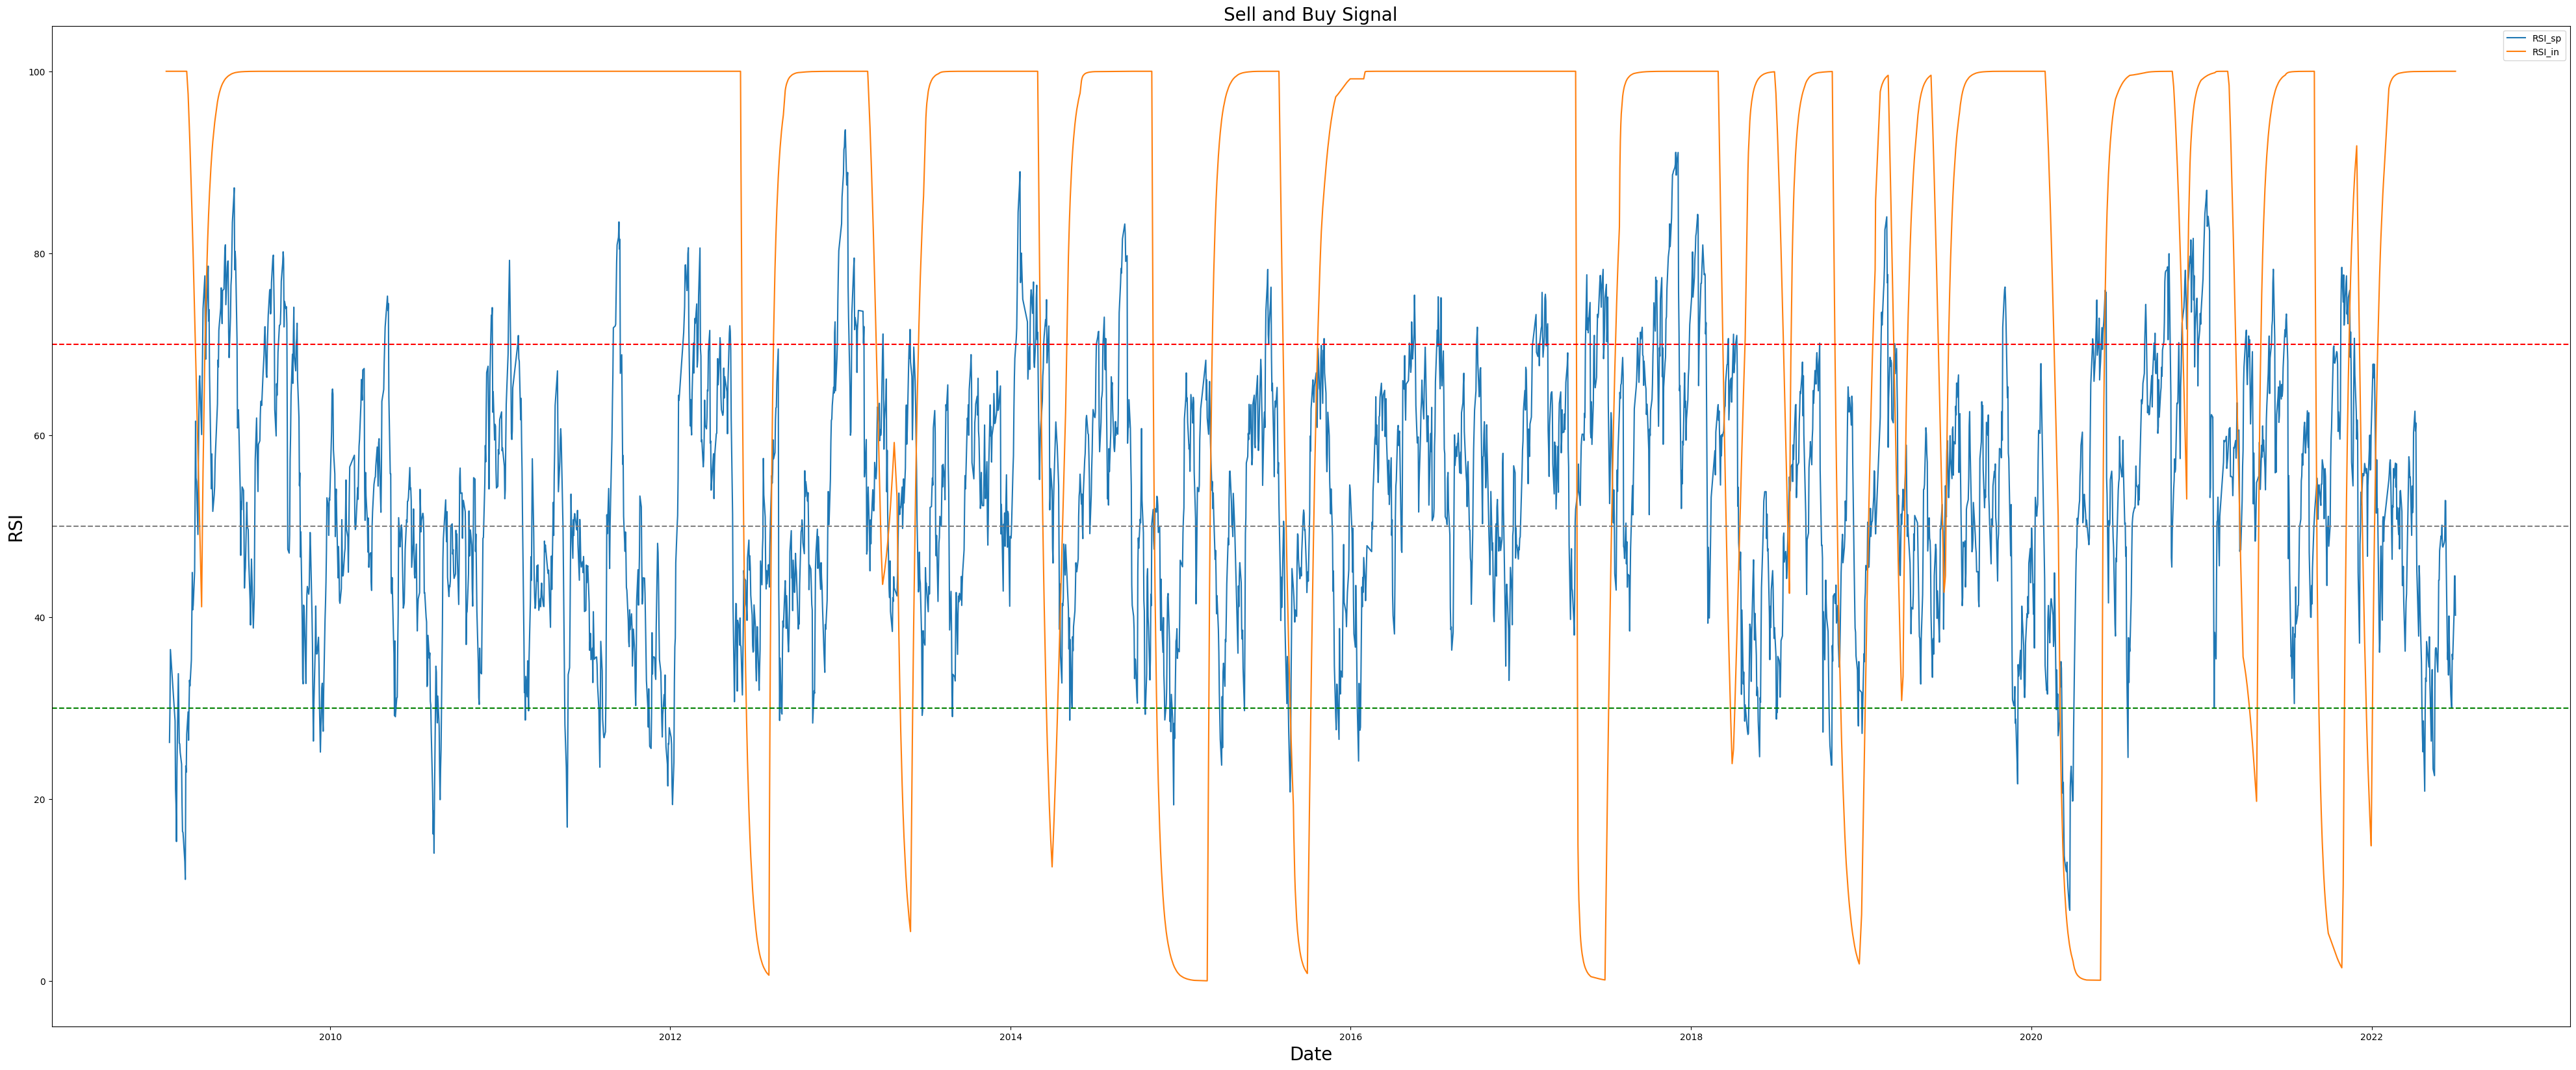

In [237]:
fig = plt.figure(figsize=(50, 20))
plt.plot(inf_sp_no_interpolation['Date'], inf_sp_no_interpolation['RSI_sp'], label='RSI_sp')
plt.plot(inf_sp_no_interpolation['Date'], inf_sp_no_interpolation['RSI_in'], label='RSI_in')
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
# Adding labels and title
plt.xlabel('Date', fontsize=20)
plt.ylabel('RSI', fontsize=20)
plt.title('Sell and Buy Signal', fontsize=20)

# Adding a legend
plt.legend()

# Displaying the chart
plt.show()

Use inflation as lagging factor

In [238]:
RSI_sp_5050_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 47 to 3351
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          298 non-null    datetime64[ns]
 1   StockPrice    298 non-null    float64       
 2   Trading days  298 non-null    int64         
 3   RSI_sp        298 non-null    float64       
 4   prev_rsi      298 non-null    float64       
 5   signal        298 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [239]:
RSI_in_5050_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 59 to 3250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          33 non-null     datetime64[ns]
 1   StockPrice    33 non-null     float64       
 2   Trading days  33 non-null     int64         
 3   RSI_sp        33 non-null     float64       
 4   Date_inf      33 non-null     datetime64[ns]
 5   RSI_in        33 non-null     float64       
 6   prev_rsi      33 non-null     float64       
 7   signal        33 non-null     object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 2.3+ KB


In [240]:
RSI_in_5050_signal

Date  StockPrice  Trading days     RSI_sp   Date_inf     RSI_in   
59   2009-04-02      297.30            60  68.857583 2009-04-02  51.566732  \
853  2012-06-07      434.41           854  45.130461 2012-06-07  48.933472   
895  2012-08-06      423.16           896  55.572871 2012-08-06  55.514694   
1055 2013-03-28      490.67          1056  59.978728 2013-03-28  49.539851   
1067 2013-04-15      480.02          1068  43.138330 2013-04-15  50.070709   
1077 2013-05-03      475.24          1078  44.185662 2013-05-03  48.878921   
1103 2013-06-10      524.56          1104  65.951548 2013-06-10  51.007334   
1291 2014-03-12      590.02          1292  67.352361 2014-03-12  47.257756   
1320 2014-04-23      569.36          1321  41.256578 2014-04-23  51.287643   
1456 2014-11-06      597.85          1457  48.156238 2014-11-06  47.596641   
1534 2015-03-06      593.97          1535  59.224775 2015-03-06  54.783576   
1646 2015-08-17      573.15          1647  30.499402 2015-08-17  45.912295   
1687 2015-10-14      589.98          1688  63.624649 2015-10-14  51.008565   
2073 2017-05-03      719.54          2074  53.994484 2017-05-03  14.973620   
2126 2017-07-17      768.91          2127  51.770920 2017-07-17  57.770357   
2293 2018-03-19     1159.22          2294  67.759434 2018-03-19  45.587526   
2313 2018-04-16     1148.49          2314  45.204930 2018-04-16  50.930163   
2385 2018-07-30      949.73          2386  53.057130 2018-07-30  44.654668   
2387 2018-08-01      952.77          2388  53.832778 2018-08-01  53.922059   
2459 2018-11-12      918.12          2460  41.288458 2018-11-12  46.000309   
2505 2019-01-17      901.89          2506  45.468252 2019-01-17  50.539491   
2544 2019-03-20     1002.30          2545  62.393160 2019-03-20  49.762699   
2556 2019-04-05      989.26          2557  54.443822 2019-04-05  52.663839   
2609 2019-06-25      960.13          2610  50.221506 2019-06-25  49.126954   
2615 2019-07-03      960.39          2616  51.019093 2019-07-03  54.299334   
2781 2020-03-02      884.43          2782  28.510430 2020-03-02  35.319883   
2846 2020-06-04      883.90          2847  71.860661 2020-06-04  56.953376   
3049 2021-03-25     1163.10          3050  47.734590 2021-03-25  47.943241   
3074 2021-05-04     1242.20          3075  55.542042 2021-05-04  52.960069   
3161 2021-09-06     1346.39          3162  55.270643 2021-09-06  44.875270   
3206 2021-11-08     1467.57          3207  77.515617 2021-11-08  52.666846   
3231 2021-12-13     1476.21          3232  55.785281 2021-12-13  47.386792   
3250 2022-01-10     1503.71          3251  55.900548 2022-01-10  59.071779   

        prev_rsi signal  
59     46.669001    BUY  
853    53.780282   SELL  
895    35.835432    BUY  
1055   51.669569   SELL  
1067   48.238289    BUY  
1077   53.235159   SELL  
1103   39.994859    BUY  
1291   50.486631   SELL  
1320   49.328008    BUY  
1456   53.137799   SELL  
1534   49.252559    BUY  
1646   54.047771   SELL  
1687   48.103733    BUY  
2073  100.000000   SELL  
2126   49.689064    BUY  
2293   53.231200   SELL  
2313   45.144842    BUY  
2385   50.956667   SELL  
2387   42.620667    BUY  
2459   56.283481   SELL  
2505   47.956050    BUY  
2544   52.174487   SELL  
2556   48.534021    BUY  
2609   51.329681   SELL  
2615   49.713874    BUY  
2781   51.199473   SELL  
2846   48.847237    BUY  
3049   50.154991   SELL  
3074   19.755613    BUY  
3161   85.559684   SELL  
3206   38.369735    BUY  
3231   56.143424   SELL  
3250   48.982383    BUY

In [241]:
def delay_inflation(delay_day):
    #Delay inflation days
    RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
    #join two data frame to find signal
    df_final = pd.merge(RSI_sp_5050_signal, RSI_in_5050_signal, left_on='shifted_date', right_on='Date_inf', how='inner')
    #take out useful column
    df_final = df_final[['Date_x','StockPrice_x','Trading days_x','signal_x','Date_inf','signal_y']]
    df_final.rename(columns={'Date_x': 'Date'}, inplace=True)
    df_final.rename(columns={'StockPrice_x': 'Stock_price'}, inplace=True)
    df_final.rename(columns={'Trading days_x': 'Trading days'}, inplace=True)
    df_final.rename(columns={'signal_x': 'signal_RSI_sp'}, inplace=True)
    df_final.rename(columns={'signal_y': 'signal_RSI_in'}, inplace=True)
    #if df_final['signal_RSI_sp'] == 'BUY' and df_final['signal_RSI_sp'] == 'BUY':
        #df_final['final_signal'] == 'BUY'
    #elif df_final['signal_RSI_sp'] == 'SELL' and df_final['signal_RSI_sp'] == 'SELL':
        #df_final['final_signal'] == 'SELL'
    #else:
        #df_final['final_signal'] == 'NO_SIGNAL'

    print(df_final)

In [242]:
#signal_
delay_day = list(range(1, 31))
for i in delay_day:
    delay_inflation(i)
    print('delay_day =', i+1)
    print(delay_inflation)

        Date  Stock_price  Trading days signal_RSI_sp   Date_inf signal_RSI_in
0 2019-01-16       908.70          2505          SELL 2019-01-17           BUY
1 2019-06-24       962.85          2609           BUY 2019-06-25          SELL
2 2021-03-24      1161.81          3049          SELL 2021-03-25          SELL
delay_day = 2
<function delay_inflation at 0x17a342c00>
        Date  Stock_price  Trading days signal_RSI_sp   Date_inf signal_RSI_in
0 2014-11-04       598.39          1455          SELL 2014-11-06          SELL
1 2018-07-30       949.73          2386           BUY 2018-08-01           BUY
2 2019-01-15       909.68          2504           BUY 2019-01-17           BUY
3 2019-07-01       965.61          2614           BUY 2019-07-03           BUY
delay_day = 3
<function delay_inflation at 0x17a342c00>
        Date  Stock_price  Trading days signal_RSI_sp   Date_inf signal_RSI_in
0 2012-08-03       418.21           895           BUY 2012-08-06           BUY
1 2018-04-13      1

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/3823525426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/3823525426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/38

# use the inflation as leading factor

In [243]:
def delay_inflation_lead(delay_day):
    #Delay inflation days
    RSI_in_5050_signal['shifted_date'] = RSI_in_5050_signal['Date'] + pd.DateOffset(days=delay_day)
    #join two data frame to find signal
    df_final = pd.merge(RSI_sp_5050_signal, RSI_in_5050_signal, left_on='Date', right_on='shifted_date', how='inner')
    #take out useful column
    df_final = df_final[['Date_x','StockPrice_x','Trading days_x','signal_x','Date_inf','signal_y']]
    df_final.rename(columns={'Date_x': 'Date'}, inplace=True)
    df_final.rename(columns={'StockPrice_x': 'Stock_price'}, inplace=True)
    df_final.rename(columns={'Trading days_x': 'Trading days'}, inplace=True)
    df_final.rename(columns={'signal_x': 'signal_RSI_sp'}, inplace=True)
    df_final.rename(columns={'signal_y': 'signal_RSI_in'}, inplace=True)
    print(df_final)

In [244]:
#signal_
delay_day = list(range(1, 31))
for i in delay_day:
    delay_inflation_lead(i)
    print('delay_day =', i+1)
    print(delay_inflation)

        Date  Stock_price  Trading days signal_RSI_sp   Date_inf signal_RSI_in
0 2014-11-07       602.59          1458           BUY 2014-11-06          SELL
1 2019-06-26       959.13          2611          SELL 2019-06-25          SELL
delay_day = 2
<function delay_inflation at 0x17a342c00>
Empty DataFrame
Columns: [Date, Stock_price, Trading days, signal_RSI_sp, Date_inf, signal_RSI_in]
Index: []
delay_day = 3
<function delay_inflation at 0x17a342c00>
        Date  Stock_price  Trading days signal_RSI_sp   Date_inf signal_RSI_in
0 2013-05-06       488.32          1079           BUY 2013-05-03          SELL
delay_day = 4
<function delay_inflation at 0x17a342c00>
        Date  Stock_price  Trading days signal_RSI_sp   Date_inf signal_RSI_in
0 2017-07-21       761.86          2131          SELL 2017-07-17           BUY
1 2019-01-21       911.05          2508           BUY 2019-01-17           BUY
2 2021-03-29      1175.68          3052           BUY 2021-03-25          SELL
delay_day = 

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/1606735860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_in_5050_signal['shifted_date'] = RSI_in_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/1606735860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_in_5050_signal['shifted_date'] = RSI_in_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/16

# 4.2.2 Convert Monthly Inflation data to daily data using linear interpolation

In [245]:
monthly_data = pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Inflation_Data_interpolation.csv')

In [246]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_inf             162 non-null    object 
 1   Inflation variation  162 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [247]:
monthly_data['Date_inf'] = pd.to_datetime(monthly_data['Date_inf'])
monthly_data

Date_inf  Inflation variation
0   2009-01-01                 0.32
1   2009-02-01                 1.17
2   2009-03-01                -0.17
3   2009-04-01                 0.35
4   2009-05-01                 0.44
..         ...                  ...
157 2022-02-01                 1.00
158 2022-03-01                 0.70
159 2022-04-01                 0.18
160 2022-05-01                 0.38
161 2022-06-01                 0.69

[162 rows x 2 columns]

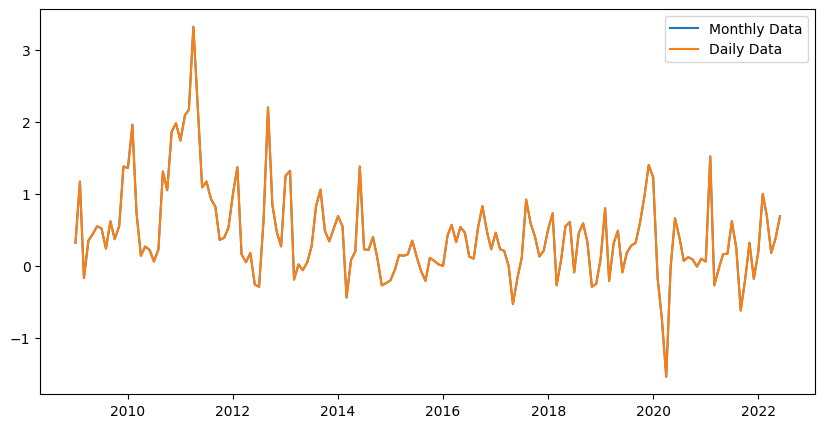

In [248]:
# Set the 'Date_inf' column as the DataFrame's index
monthly_data.set_index('Date_inf', inplace=True, drop=False)

# Create a daily datetime index for the new DataFrame
daily_index = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='D')

# Create a new DataFrame with the daily index
daily_data = pd.DataFrame(index=daily_index)

# Resample the monthly data to daily using linear interpolation
daily_data['Inflation variation'] = monthly_data['Inflation variation'].resample('D').interpolate(method='linear')

# Plot the monthly and daily data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(monthly_data.index, monthly_data['Inflation variation'], label='Monthly Data')
ax.plot(daily_data.index, daily_data['Inflation variation'], label='Daily Data')
ax.legend()
plt.show()

In [249]:
daily_data

Inflation variation
2009-01-01             0.320000
2009-01-02             0.347419
2009-01-03             0.374839
2009-01-04             0.402258
2009-01-05             0.429677
...                         ...
2022-05-28             0.650000
2022-05-29             0.660000
2022-05-30             0.670000
2022-05-31             0.680000
2022-06-01             0.690000

[4900 rows x 1 columns]

In [250]:
#name the index column in dataframe "daily_date"
daily_data.index.name = 'Date_inf'

In [251]:
daily_data['gain'] = daily_data['Inflation variation'].clip(lower=0).round(2)
daily_data['loss'] = daily_data['Inflation variation'].clip(upper=0).abs().round(2)

In [252]:
window_length = 14
# Get initial Averages
daily_data['avg_gain'] = daily_data['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
daily_data['avg_loss'] = daily_data['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
# View Result
print(daily_data)
# View first SMA value
print(daily_data.iloc[window_length-1: window_length+2])


            Inflation variation  gain  loss  avg_gain  avg_loss
Date_inf                                                       
2009-01-01             0.320000  0.32   0.0       NaN       NaN
2009-01-02             0.347419  0.35   0.0       NaN       NaN
2009-01-03             0.374839  0.37   0.0       NaN       NaN
2009-01-04             0.402258  0.40   0.0       NaN       NaN
2009-01-05             0.429677  0.43   0.0       NaN       NaN
...                         ...   ...   ...       ...       ...
2022-05-28             0.650000  0.65   0.0       NaN       NaN
2022-05-29             0.660000  0.66   0.0       NaN       NaN
2022-05-30             0.670000  0.67   0.0       NaN       NaN
2022-05-31             0.680000  0.68   0.0       NaN       NaN
2022-06-01             0.690000  0.69   0.0       NaN       NaN

[4900 rows x 5 columns]
            Inflation variation  gain  loss  avg_gain  avg_loss
Date_inf                                                       
2009-01-14     

In [253]:
for i, row in enumerate(daily_data['avg_gain'].iloc[window_length+1:]):
    daily_data['avg_gain'].iloc[i + window_length + 1] =\
        (daily_data['avg_gain'].iloc[i + window_length] *
         (window_length - 1) +
         daily_data['gain'].iloc[i + window_length + 1])\
        / window_length
# Average Losses
for i, row in enumerate(daily_data['avg_loss'].iloc[window_length+1:]):
    daily_data['avg_loss'].iloc[i + window_length + 1] =\
        (daily_data['avg_loss'].iloc[i + window_length] *
         (window_length - 1) +
         daily_data['loss'].iloc[i + window_length + 1])\
        / window_length
# View initial results
print(daily_data[window_length-1:window_length+5])

            Inflation variation  gain  loss  avg_gain  avg_loss
Date_inf                                                       
2009-01-14             0.676452  0.68   0.0  0.497857       0.0
2009-01-15             0.703871  0.70   0.0  0.525000       0.0
2009-01-16             0.731290  0.73   0.0  0.539643       0.0
2009-01-17             0.758710  0.76   0.0  0.555383       0.0
2009-01-18             0.786129  0.79   0.0  0.572141       0.0
2009-01-19             0.813548  0.81   0.0  0.589131       0.0


In [254]:
# Calculate RS Values
daily_data['RS'] = daily_data['avg_gain'] / daily_data['avg_loss']

In [255]:
# Calculate RSI
daily_data['RSI_in'] = 100 - (100 / (1.0 + daily_data['RS']))
print(daily_data)

            Inflation variation  gain  loss  avg_gain      avg_loss   
Date_inf                                                              
2009-01-01             0.320000  0.32   0.0       NaN           NaN  \
2009-01-02             0.347419  0.35   0.0       NaN           NaN   
2009-01-03             0.374839  0.37   0.0       NaN           NaN   
2009-01-04             0.402258  0.40   0.0       NaN           NaN   
2009-01-05             0.429677  0.43   0.0       NaN           NaN   
...                         ...   ...   ...       ...           ...   
2022-05-28             0.650000  0.65   0.0  0.530107  3.793224e-07   
2022-05-29             0.660000  0.66   0.0  0.539385  3.522280e-07   
2022-05-30             0.670000  0.67   0.0  0.548714  3.270688e-07   
2022-05-31             0.680000  0.68   0.0  0.558092  3.037068e-07   
2022-06-01             0.690000  0.69   0.0  0.567514  2.820134e-07   

                      RS     RSI_in  
Date_inf                             


In [256]:
inf_sp_interpolation = pd.merge(df_stock_price, daily_data, left_on='Date', right_on='Date_inf', how='left')

In [257]:
inf_sp_interpolation

Date  StockPrice  Trading days     RSI_sp  Inflation variation   
0    2009-01-02      313.34             1        NaN             0.347419  \
1    2009-01-05      311.91             2        NaN             0.429677   
2    2009-01-06      314.04             3        NaN             0.457097   
3    2009-01-07      319.58             4        NaN             0.484516   
4    2009-01-08      314.15             5        NaN             0.511935   
...         ...         ...           ...        ...                  ...   
3361 2022-06-24     1185.48          3362  35.370958                  NaN   
3362 2022-06-27     1202.82          3363  40.420868                  NaN   
3363 2022-06-28     1218.10          3364  44.533727                  NaN   
3364 2022-06-29     1218.09          3365  44.531560                  NaN   
3365 2022-06-30     1197.60          3366  40.214401                  NaN   

      gain  loss  avg_gain  avg_loss  RS  RSI_in  
0     0.35   0.0       NaN       NaN NaN     NaN  
1     0.43   0.0       NaN       NaN NaN     NaN  
2     0.46   0.0       NaN       NaN NaN     NaN  
3     0.48   0.0       NaN       NaN NaN     NaN  
4     0.51   0.0       NaN       NaN NaN     NaN  
...    ...   ...       ...       ...  ..     ...  
3361   NaN   NaN       NaN       NaN NaN     NaN  
3362   NaN   NaN       NaN       NaN NaN     NaN  
3363   NaN   NaN       NaN       NaN NaN     NaN  
3364   NaN   NaN       NaN       NaN NaN     NaN  
3365   NaN   NaN       NaN       NaN NaN     NaN  

[3366 rows x 11 columns]

Text(0.5, 1.0, 'RSI_using_inflation_daily_interpolation')

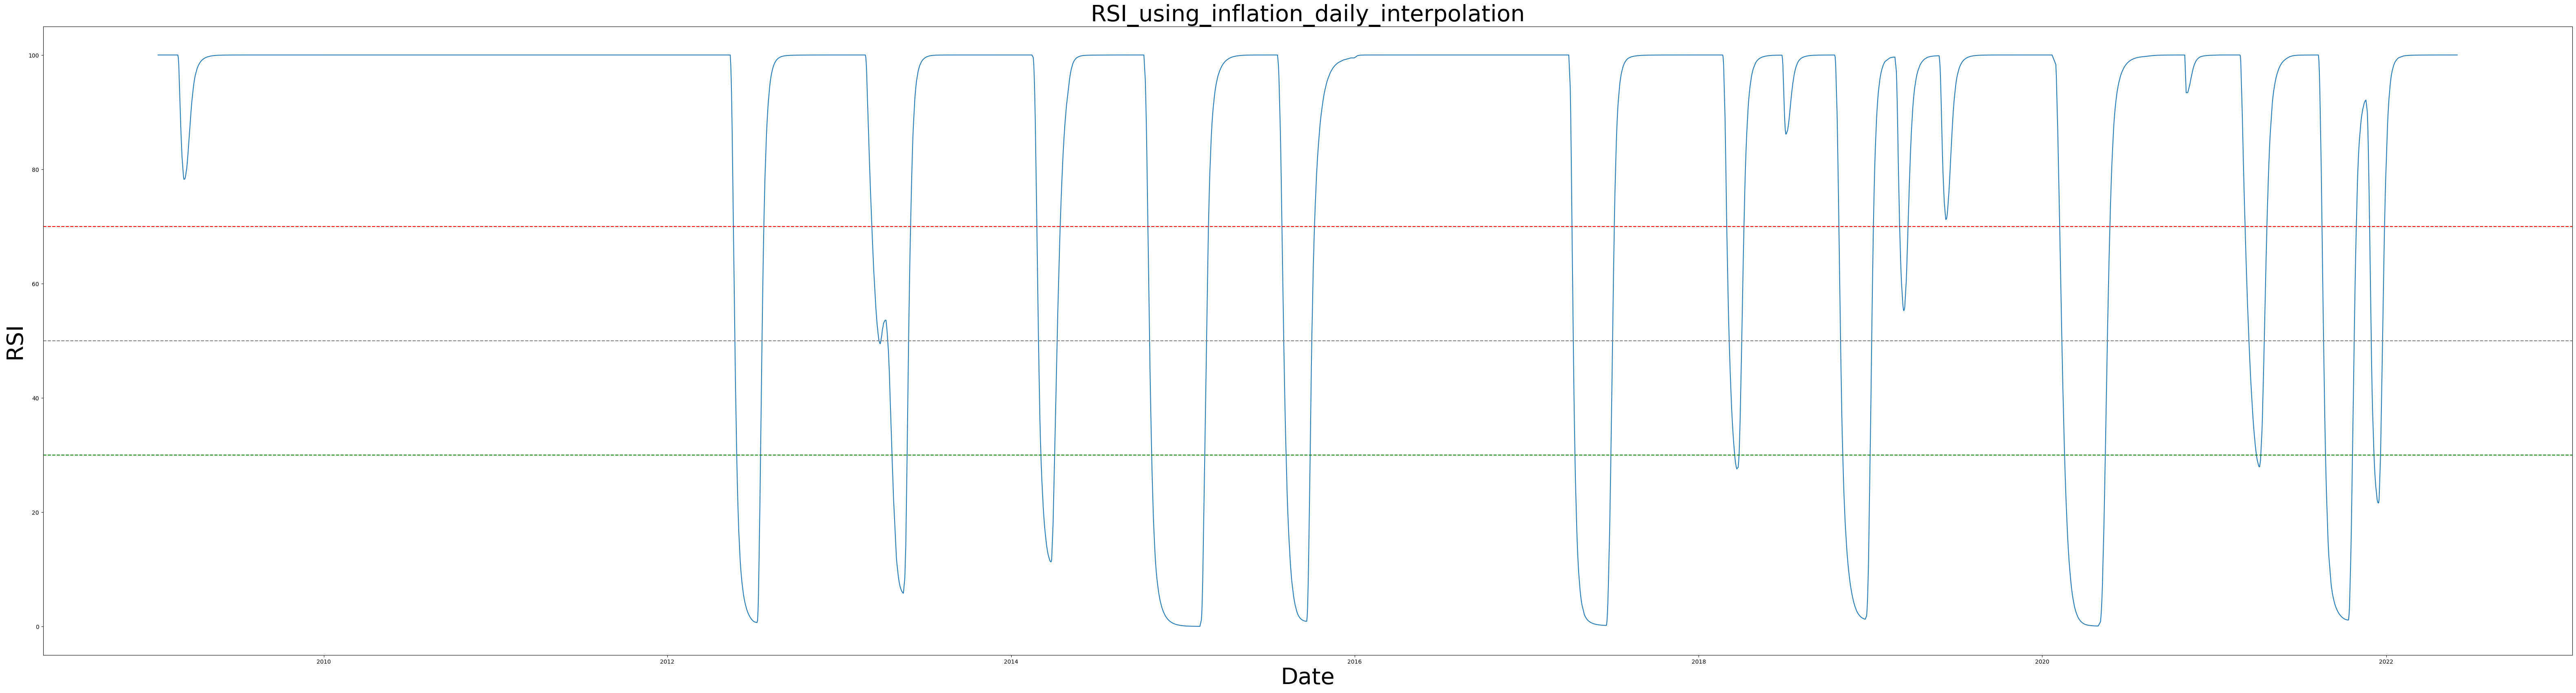

In [258]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(80, 20))
plt.plot(inf_sp_interpolation['Date'], inf_sp_interpolation['RSI_in'])
# add labels and a title
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
plt.xlabel('Date',  fontsize=40)
plt.ylabel('RSI',  fontsize=40)
plt.title('RSI_using_inflation_daily_interpolation',  fontsize=40)

# Use daily inflation to calculate RSI and find buy/sell signal Case 30%/70%

In [259]:
#Using flag to create Buy/Sell signal for case 30/70
flag = False
def check_signal(inf_sp_interpolation):
    global flag
    if (inf_sp_interpolation['RSI_in'] > 30) & (inf_sp_interpolation['prev_rsi'] < 30) and not flag:  
        flag = True
        return "BUY"
    elif (inf_sp_interpolation['RSI_in'] < 70) & (inf_sp_interpolation['prev_rsi'] > 70) and flag: 
        flag = False
        return "SELL"
    else:
        return "HOLD"
inf_sp_interpolation['prev_rsi'] = inf_sp_interpolation['RSI_in'].shift(1)
inf_sp_interpolation['signal'] = inf_sp_interpolation.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_in_3070_signal = inf_sp_interpolation[(inf_sp_interpolation['signal'] == 'BUY') | (inf_sp_interpolation['signal'] == 'SELL')]
print(RSI_in_3070_signal)

           Date  StockPrice  Trading days     RSI_sp  Inflation variation   
882  2012-07-18      418.83           883  48.726449             0.214516  \
1042 2013-03-11      476.50          1043  54.000573            -0.122258   
1093 2013-05-27      512.41          1094  67.888782             0.032258   
1280 2014-02-25      586.20          1281  75.074658            -0.298571   
1308 2014-04-04      593.04          1309  54.866460             0.092000   
1443 2014-10-20      589.24          1444  33.752048            -0.122903   
1526 2015-02-24      596.95          1527  68.241535             0.114286   
1635 2015-07-31      621.06          1636  52.487611            -0.063548   
1676 2015-09-29      561.19          1677  42.707007             0.088667   
2057 2017-04-07      727.95          2058  65.811274            -0.106000   
2114 2017-06-29      771.75          2115  71.795338             0.091333   
2282 2018-03-02     1121.21          2283  62.662397            -0.258710   

In [260]:
RSI_in_3070_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 882 to 3237
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 23 non-null     datetime64[ns]
 1   StockPrice           23 non-null     float64       
 2   Trading days         23 non-null     int64         
 3   RSI_sp               23 non-null     float64       
 4   Inflation variation  23 non-null     float64       
 5   gain                 23 non-null     float64       
 6   loss                 23 non-null     float64       
 7   avg_gain             23 non-null     float64       
 8   avg_loss             23 non-null     float64       
 9   RS                   23 non-null     float64       
 10  RSI_in               23 non-null     float64       
 11  prev_rsi             23 non-null     float64       
 12  signal               23 non-null     object        
dtypes: datetime64[ns](1), float64(10), int

In [261]:
count = RSI_in_3070_signal['signal'].value_counts()
print(count)

signal
BUY     12
SELL    11
Name: count, dtype: int64


In [262]:
#Export to excel file
filename = 'RSI_in_3070_signal_interpolation.xlsx'
RSI_in_3070_signal.to_excel(filename, index=False)

# Use daily inflation to calculate RSI and find buy/sell signal Case 50%/50%

In [263]:
#Using flag to create Buy/Sell signal for case 50/50
flag = False
def check_signal(inf_sp_interpolation):
    global flag
    if (inf_sp_interpolation['RSI_in'] > 50) & (inf_sp_interpolation['prev_rsi'] < 50) and not flag:  
        flag = True
        return "BUY"
    elif (inf_sp_interpolation['RSI_in'] < 50) & (inf_sp_interpolation['prev_rsi'] > 50) and flag: 
        flag = False
        return "SELL"
    else:
        return "HOLD"
inf_sp_interpolation['prev_rsi'] = inf_sp_interpolation['RSI_in'].shift(1)
inf_sp_interpolation['signal'] = inf_sp_interpolation.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_in_5050_signal = inf_sp_interpolation[(inf_sp_interpolation['signal'] == 'BUY') | (inf_sp_interpolation['signal'] == 'SELL')]
print(RSI_in_5050_signal)

           Date  StockPrice  Trading days     RSI_sp  Inflation variation   
885  2012-07-23      421.99           886  51.008703             0.362903  \
1054 2013-03-27      491.26          1055  60.604931            -0.013871   
1057 2013-04-01      505.81          1058  69.378514             0.020000   
1067 2013-04-15      480.02          1068  43.138330            -0.017333   
1094 2013-05-28      516.33          1095  69.851833             0.035806   
1283 2014-02-28      586.48          1284  71.328714            -0.404643   
1311 2014-04-10      601.33          1312  59.598827             0.116000   
1446 2014-10-23      593.53          1447  40.063451            -0.159677   
1526 2015-02-24      596.95          1527  68.241535             0.114286   
1637 2015-08-04      600.76          1638  39.630178            -0.083548   
1679 2015-10-02      562.31          1680  43.953787             0.108710   
2058 2017-04-10      729.87          2059  67.671055            -0.159000   

In [264]:
RSI_in_5050_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 885 to 3241
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 25 non-null     datetime64[ns]
 1   StockPrice           25 non-null     float64       
 2   Trading days         25 non-null     int64         
 3   RSI_sp               25 non-null     float64       
 4   Inflation variation  25 non-null     float64       
 5   gain                 25 non-null     float64       
 6   loss                 25 non-null     float64       
 7   avg_gain             25 non-null     float64       
 8   avg_loss             25 non-null     float64       
 9   RS                   25 non-null     float64       
 10  RSI_in               25 non-null     float64       
 11  prev_rsi             25 non-null     float64       
 12  signal               25 non-null     object        
dtypes: datetime64[ns](1), float64(10), int

In [265]:
count = RSI_in_5050_signal['signal'].value_counts()
print(count)

signal
BUY     13
SELL    12
Name: count, dtype: int64


In [266]:
#Export to excel file
filename = 'RSI_in_5050_signal_interpolation.xlsx'
RSI_in_5050_signal.to_excel(filename, index=False)

# Combine Inflation and Stock price

In [267]:
inf_sp_interpolation = inf_sp_interpolation.drop(columns=['signal','prev_rsi'])

In [268]:
#Using flag to create Buy/Sell signal for case 50/50
flag = False
def check_signal(inf_sp_interpolation):
    global flag
    if (inf_sp_interpolation['RSI_in'] > 30) & (inf_sp_interpolation['prev_rsi_in'] < 30) and (inf_sp_interpolation['RSI_sp'] > 30) & (inf_sp_interpolation['prev_rsi_sp'] < 30) and not flag:  
        flag = True
        return "BUY"
    elif (inf_sp_interpolation['RSI_in'] < 70) & (inf_sp_interpolation['prev_rsi_in'] > 70) and (inf_sp_interpolation['RSI_sp'] < 70) & (inf_sp_interpolation['prev_rsi_sp'] > 70) and flag: 
        flag = False
        return "SELL"
    else:
        return "HOLD"
inf_sp_interpolation['prev_rsi_in'] = inf_sp_interpolation['RSI_in'].shift(1)
inf_sp_interpolation['prev_rsi_sp'] = inf_sp_interpolation['RSI_sp'].shift(1)
inf_sp_interpolation['signal'] = inf_sp_interpolation.apply(check_signal, axis=1)
#Fillter BUY/SELL signal
RSI_comb_signal = inf_sp_interpolation[(inf_sp_interpolation['signal'] == 'BUY') | (inf_sp_interpolation['signal'] == 'SELL')]
print(RSI_comb_signal)

Empty DataFrame
Columns: [Date, StockPrice, Trading days, RSI_sp, Inflation variation, gain, loss, avg_gain, avg_loss, RS, RSI_in, prev_rsi_in, prev_rsi_sp, signal]
Index: []


In [269]:
RSI_comb_signal

Empty DataFrame
Columns: [Date, StockPrice, Trading days, RSI_sp, Inflation variation, gain, loss, avg_gain, avg_loss, RS, RSI_in, prev_rsi_in, prev_rsi_sp, signal]
Index: []

# INSIGHT: Do not use inflation as lagging factor can not create any buy/sell signals

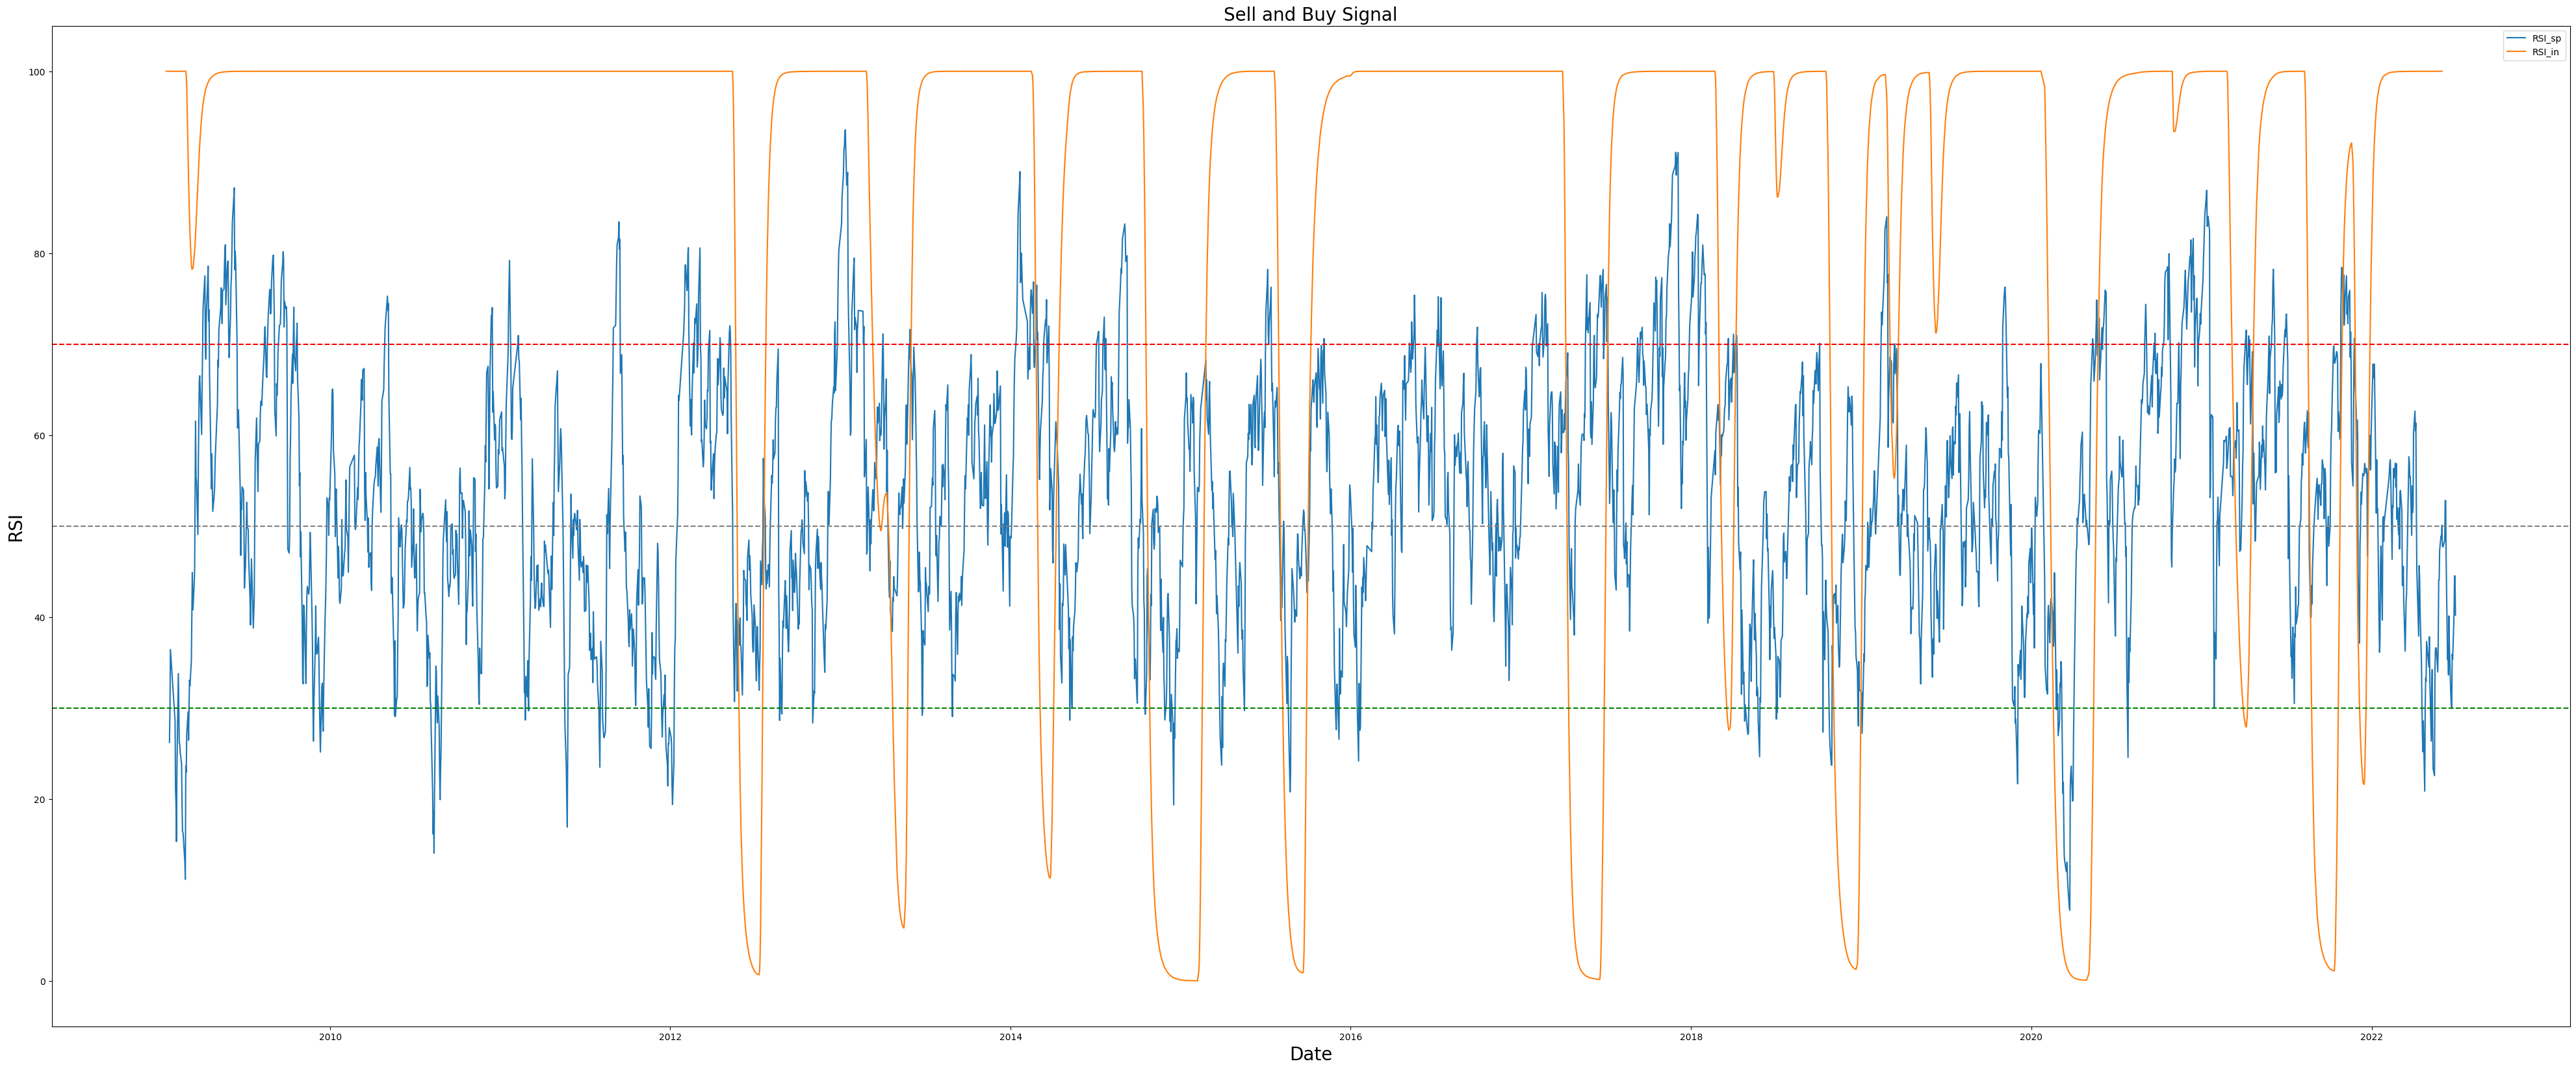

In [270]:
fig = plt.figure(figsize=(50, 20))
plt.plot(inf_sp_interpolation['Date'], inf_sp_interpolation['RSI_sp'], label='RSI_sp')
plt.plot(inf_sp_interpolation['Date'], inf_sp_interpolation['RSI_in'], label='RSI_in')
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=70, color='r', linestyle='--')
# Adding labels and title
plt.xlabel('Date', fontsize=20)
plt.ylabel('RSI', fontsize=20)
plt.title('Sell and Buy Signal', fontsize=20)

# Adding a legend
plt.legend()

# Displaying the chart
plt.show()

# Use inflation as lagging factor

In [271]:
RSI_sp_5050_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 47 to 3351
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          298 non-null    datetime64[ns]
 1   StockPrice    298 non-null    float64       
 2   Trading days  298 non-null    int64         
 3   RSI_sp        298 non-null    float64       
 4   prev_rsi      298 non-null    float64       
 5   signal        298 non-null    object        
 6   shifted_date  298 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 18.6+ KB


In [272]:
RSI_in_5050_signal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 885 to 3241
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 25 non-null     datetime64[ns]
 1   StockPrice           25 non-null     float64       
 2   Trading days         25 non-null     int64         
 3   RSI_sp               25 non-null     float64       
 4   Inflation variation  25 non-null     float64       
 5   gain                 25 non-null     float64       
 6   loss                 25 non-null     float64       
 7   avg_gain             25 non-null     float64       
 8   avg_loss             25 non-null     float64       
 9   RS                   25 non-null     float64       
 10  RSI_in               25 non-null     float64       
 11  prev_rsi             25 non-null     float64       
 12  signal               25 non-null     object        
dtypes: datetime64[ns](1), float64(10), int

In [273]:
def delay_inflation(delay_day):
    #Delay inflation days
    RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
    #join two data frame to find signal
    df_final = pd.merge(RSI_sp_5050_signal, RSI_in_5050_signal, left_on='shifted_date', right_on='Date', how='inner')
    #take out useful column
    df_final = df_final[['Date_x','StockPrice_x','Trading days_x','signal_x','signal_y']]
    df_final.rename(columns={'Date_x': 'Date'}, inplace=True)
    df_final.rename(columns={'StockPrice_x': 'Stock_price'}, inplace=True)
    df_final.rename(columns={'Trading days_x': 'Trading days'}, inplace=True)
    df_final.rename(columns={'signal_x': 'signal_RSI_sp'}, inplace=True)
    df_final.rename(columns={'signal_y': 'signal_RSI_in'}, inplace=True)
    #if df_final['signal_RSI_sp'] == 'BUY' and df_final['signal_RSI_sp'] == 'BUY':
        #df_final['final_signal'] == 'BUY'
    #elif df_final['signal_RSI_sp'] == 'SELL' and df_final['signal_RSI_sp'] == 'SELL':
        #df_final['final_signal'] == 'SELL'
    #else:
        #df_final['final_signal'] == 'NO_SIGNAL'

    print(df_final)

In [274]:
#signal after delay day
delay_day = list(range(1, 31))
for i in delay_day:
    delay_inflation(i)
    print('delay_day =', i+1)
    print(delay_inflation)

        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2015-08-03       609.47          1637          SELL          SELL
delay_day = 2
<function delay_inflation at 0x17fb52340>
Empty DataFrame
Columns: [Date, Stock_price, Trading days, signal_RSI_sp, signal_RSI_in]
Index: []
delay_day = 3
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2021-08-20      1329.43          3153          SELL          SELL
1 2021-12-24      1477.03          3241           BUY           BUY
delay_day = 4
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2012-07-19       428.38           884           BUY           BUY
1 2021-12-23      1456.96          3240          SELL           BUY
delay_day = 5
<function delay_inflation at 0x17fb52340>
Empty DataFrame
Columns: [Date, Stock_price, Trading days, signal_RSI_sp, signal_RSI_in]
Index: []
delay_day = 6
<function delay_infl

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/1796255735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/1796255735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/17

# use inflation as the leading factor

In [275]:
def delay_inflation_lead(delay_day):
    #Delay inflation days
    RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
    #join two data frame to find signal
    df_final = pd.merge(RSI_sp_5050_signal, RSI_in_5050_signal, left_on='Date', right_on='shifted_date', how='inner')
    #take out useful column
    df_final = df_final[['Date_x','StockPrice_x','Trading days_x','signal_x','signal_y']]
    df_final.rename(columns={'Date_x': 'Date'}, inplace=True)
    df_final.rename(columns={'StockPrice_x': 'Stock_price'}, inplace=True)
    df_final.rename(columns={'Trading days_x': 'Trading days'}, inplace=True)
    df_final.rename(columns={'signal_x': 'signal_RSI_sp'}, inplace=True)
    df_final.rename(columns={'signal_y': 'signal_RSI_in'}, inplace=True)
    #if df_final['signal_RSI_sp'] == 'BUY' and df_final['signal_RSI_sp'] == 'BUY':
        #df_final['final_signal'] == 'BUY'
    #elif df_final['signal_RSI_sp'] == 'SELL' and df_final['signal_RSI_sp'] == 'SELL':
        #df_final['final_signal'] == 'SELL'
    #else:
        #df_final['final_signal'] == 'NO_SIGNAL'

    print(df_final)

In [276]:
#signal after delay day
delay_day = list(range(1, 31))
for i in delay_day:
    delay_inflation(i)
    print('delay_day =', i+1)
    print(delay_inflation)

        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2015-08-03       609.47          1637          SELL          SELL
delay_day = 2
<function delay_inflation at 0x17fb52340>
Empty DataFrame
Columns: [Date, Stock_price, Trading days, signal_RSI_sp, signal_RSI_in]
Index: []
delay_day = 3
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2021-08-20      1329.43          3153          SELL          SELL
1 2021-12-24      1477.03          3241           BUY           BUY
delay_day = 4
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2012-07-19       428.38           884           BUY           BUY
1 2021-12-23      1456.96          3240          SELL           BUY
delay_day = 5
<function delay_inflation at 0x17fb52340>
Empty DataFrame
Columns: [Date, Stock_price, Trading days, signal_RSI_sp, signal_RSI_in]
Index: []
delay_day = 6
<function delay_infl

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/1796255735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/1796255735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_sp_5050_signal['shifted_date'] = RSI_sp_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/17

In [279]:
def delay_inflation_lead(delay_day):
    #Delay inflation days
    RSI_in_5050_signal['shifted_date'] = RSI_in_5050_signal['Date'] + pd.DateOffset(days=delay_day)
    #join two data frame to find signal
    df_final = pd.merge(RSI_sp_5050_signal, RSI_in_5050_signal, left_on='Date', right_on='shifted_date', how='inner')
    #take out useful column
    df_final = df_final[['Date_x','StockPrice_x','Trading days_x','signal_x','signal_y']]
    df_final.rename(columns={'Date_x': 'Date'}, inplace=True)
    df_final.rename(columns={'StockPrice_x': 'Stock_price'}, inplace=True)
    df_final.rename(columns={'Trading days_x': 'Trading days'}, inplace=True)
    df_final.rename(columns={'signal_x': 'signal_RSI_sp'}, inplace=True)
    df_final.rename(columns={'signal_y': 'signal_RSI_in'}, inplace=True)
    print(df_final)

In [280]:
#signal_
delay_day = list(range(1, 31))
for i in delay_day:
    delay_inflation_lead(i)
    print('delay_day =', i+1)
    print(delay_inflation)

        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2012-07-24       415.63           887          SELL           BUY
delay_day = 2
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2021-12-03      1443.32          3226          SELL          SELL
delay_day = 3
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2015-10-05        570.0          1681           BUY           BUY
delay_day = 4
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2017-04-14       718.45          2063          SELL          SELL
delay_day = 5
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days signal_RSI_sp signal_RSI_in
0 2014-04-15       586.09          1315          SELL           BUY
delay_day = 6
<function delay_inflation at 0x17fb52340>
        Date  Stock_price  Trading days 

/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/3651440103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_in_5050_signal['shifted_date'] = RSI_in_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/3651440103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI_in_5050_signal['shifted_date'] = RSI_in_5050_signal['Date'] + pd.DateOffset(days=delay_day)
/var/folders/l8/wkzc4b_j4sv0sy65nbz37s9r0000gn/T/ipykernel_4254/36

# 5. Test

5.1 White's reality check

In [114]:
RSI_in_3070= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_3070_signal_data.csv')
RSI_in_3070_interpolation= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_3070_signal_interpolation_data.csv')
RSI_in_5050= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_5050_signal_data.csv')
RSI_in_5050_interpolation= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_5050_signal_interpolation_data.csv')
RSI_sp_3070= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_sp_3070_signal_data.csv')
RSI_sp_5050= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_sp_5050_signal_data.csv')


In [115]:
RSI_in_3070

Date  StockPrice  Trading days        rsi    prev_rsi signal   
0   03/08/2012      418.21           895  35.835432   26.508372    BUY  \
1   19/03/2013      480.48          1049  68.888992   70.977028   SELL   
2   05/06/2013      514.64          1101  31.472291   26.825688    BUY   
3   06/03/2014      578.56          1288  69.639387   74.117218   SELL   
4   14/04/2014      596.11          1314  33.856879   28.477067    BUY   
5   03/11/2014      603.15          1454  67.134311   99.999963   SELL   
6   03/03/2015      596.72          1532  35.017626   25.699517    BUY   
7   10/08/2015      614.53          1642  66.119545   75.915421   SELL   
8   08/10/2015      586.78          1684  31.834667   28.252664    BUY   
9   03/05/2017      719.54          2074  14.973620  100.000000   SELL   
10  10/07/2017      766.56          2122  37.332667   26.970577    BUY   
11  12/03/2018     1126.29          2289  64.347957   73.176834   SELL   
12  05/04/2018     1193.17          2307  30.405052   28.714169    BUY   
13  19/07/2018      943.97          2379  68.262605   70.372363   SELL   
14  10/01/2019      898.30          2501  31.182947   28.232408    BUY   
15  13/03/2019     1005.41          2540  67.422685   70.033625   SELL   
16  02/06/2020      874.80          2845  38.007179   22.819760    BUY   
17  23/11/2020      994.19          2968  67.362732   73.182129   SELL   
18  04/05/2021     1242.20          3075  52.960069   19.755613    BUY   
19  06/09/2021     1346.39          3162  44.875270   85.559684   SELL   
20  04/11/2021     1448.34          3205  32.522412   26.003263    BUY   
21  06/12/2021     1413.58          3227  69.347116   80.250586   SELL   
22  04/01/2022     1525.58          3247  36.436686   14.865939    BUY   

    return rate of return  Return  
0    57.78         13.82%   57.78  
1      NaN            NaN   58.45  
2    58.45         11.36%    1.04  
3      NaN            NaN   11.75  
4     1.04          0.18%  126.23  
5      NaN            NaN  350.27  
6    11.75          1.97% -259.89  
7      NaN            NaN   97.59  
8   126.23         21.51%  110.05  
9      NaN            NaN   91.25  
10  350.27         45.69%  -49.07  
11     NaN            NaN     NaN  
12 -259.89        -21.78%     NaN  
13     NaN            NaN     NaN  
14   97.59         10.86%     NaN  
15     NaN            NaN     NaN  
16  110.05         12.58%     NaN  
17     NaN            NaN     NaN  
18   91.25          7.35%     NaN  
19     NaN            NaN     NaN  
20  -49.07         -3.39%     NaN  
21     NaN            NaN     NaN  
22     NaN            NaN     NaN

5.2 Mann-Whitney U Test

In [116]:
b= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_3070_signal_data.csv')
RSI_in_3070_interpolation= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_3070_signal_interpolation_data.csv')
RSI_in_5050= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_5050_signal_data.csv')
RSI_in_5050_interpolation= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_in_5050_signal_interpolation_data.csv')
RSI_sp_3070= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_sp_3070_signal_data.csv')
RSI_sp_5050= pd.read_csv('/Users/alvin/Desktop/desktop/NCKUxCUB/Thesis/Data/Python/Resutls/RSI_sp_5050_signal_data.csv')


In [117]:
RSI_in_3070

Date  StockPrice  Trading days        rsi    prev_rsi signal   
0   03/08/2012      418.21           895  35.835432   26.508372    BUY  \
1   19/03/2013      480.48          1049  68.888992   70.977028   SELL   
2   05/06/2013      514.64          1101  31.472291   26.825688    BUY   
3   06/03/2014      578.56          1288  69.639387   74.117218   SELL   
4   14/04/2014      596.11          1314  33.856879   28.477067    BUY   
5   03/11/2014      603.15          1454  67.134311   99.999963   SELL   
6   03/03/2015      596.72          1532  35.017626   25.699517    BUY   
7   10/08/2015      614.53          1642  66.119545   75.915421   SELL   
8   08/10/2015      586.78          1684  31.834667   28.252664    BUY   
9   03/05/2017      719.54          2074  14.973620  100.000000   SELL   
10  10/07/2017      766.56          2122  37.332667   26.970577    BUY   
11  12/03/2018     1126.29          2289  64.347957   73.176834   SELL   
12  05/04/2018     1193.17          2307  30.405052   28.714169    BUY   
13  19/07/2018      943.97          2379  68.262605   70.372363   SELL   
14  10/01/2019      898.30          2501  31.182947   28.232408    BUY   
15  13/03/2019     1005.41          2540  67.422685   70.033625   SELL   
16  02/06/2020      874.80          2845  38.007179   22.819760    BUY   
17  23/11/2020      994.19          2968  67.362732   73.182129   SELL   
18  04/05/2021     1242.20          3075  52.960069   19.755613    BUY   
19  06/09/2021     1346.39          3162  44.875270   85.559684   SELL   
20  04/11/2021     1448.34          3205  32.522412   26.003263    BUY   
21  06/12/2021     1413.58          3227  69.347116   80.250586   SELL   
22  04/01/2022     1525.58          3247  36.436686   14.865939    BUY   

    return rate of return  Return  
0    57.78         13.82%   57.78  
1      NaN            NaN   58.45  
2    58.45         11.36%    1.04  
3      NaN            NaN   11.75  
4     1.04          0.18%  126.23  
5      NaN            NaN  350.27  
6    11.75          1.97% -259.89  
7      NaN            NaN   97.59  
8   126.23         21.51%  110.05  
9      NaN            NaN   91.25  
10  350.27         45.69%  -49.07  
11     NaN            NaN     NaN  
12 -259.89        -21.78%     NaN  
13     NaN            NaN     NaN  
14   97.59         10.86%     NaN  
15     NaN            NaN     NaN  
16  110.05         12.58%     NaN  
17     NaN            NaN     NaN  
18   91.25          7.35%     NaN  
19     NaN            NaN     NaN  
20  -49.07         -3.39%     NaN  
21     NaN            NaN     NaN  
22     NaN            NaN     NaN

In [118]:
#use column 'return' to check
RSI_in_3070 = RSI_in_3070[['return']]
RSI_in_3070_interpolation = RSI_in_3070_interpolation[['return']]
RSI_in_5050 = RSI_in_5050[['return']]
RSI_in_5050_interpolation = RSI_in_5050_interpolation[['return']]
RSI_sp_3070 = RSI_sp_3070[['Return']]
RSI_sp_5050 = RSI_sp_5050[['Return']]

In [119]:
#Drop null value
RSI_in_3070 = RSI_in_3070.dropna()
RSI_in_3070_interpolation = RSI_in_3070_interpolation.dropna()
RSI_in_5050 = RSI_in_5050.dropna()
RSI_in_5050_interpolation = RSI_in_5050_interpolation.dropna()
RSI_sp_3070 = RSI_sp_3070.dropna()
RSI_sp_5050 = RSI_sp_5050.dropna()

In [126]:
RSI_in_3070_interpolation

return
0    57.67
2    73.79
4    -3.80
6    24.11
8   166.76
10  349.46
12 -271.42
14  100.70
16  341.24
18  108.49
20   95.60

In [127]:
RSI_in_3070_interpolation.describe()

return
count   11.000000
mean    94.781818
std    167.821833
min   -271.420000
25%     40.890000
50%     95.600000
75%    137.625000
max    349.460000

In [128]:
#Change value to array
RSI_in_3070 = RSI_in_3070['return'].values
RSI_in_3070_interpolation = RSI_in_3070_interpolation['return'].values
RSI_in_5050 = RSI_in_5050['return'].values
RSI_in_5050_interpolation = RSI_in_5050_interpolation['return'].values
RSI_sp_3070 = RSI_sp_3070['Return'].values
RSI_sp_5050 = RSI_sp_5050['Return'].values

In [129]:
#Mann-Whitney U Test
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(RSI_in_3070, RSI_sp_3070)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 116.0
p-value: 0.08676817270387562


In [130]:
statistic, p_value = mannwhitneyu(RSI_in_3070, RSI_sp_5050)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 1243.0
p-value: 0.004337362245798977


In [131]:
statistic, p_value = mannwhitneyu(RSI_in_3070_interpolation, RSI_sp_3070)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 132.0
p-value: 0.010987486330695522


In [132]:
statistic, p_value = mannwhitneyu(RSI_in_3070_interpolation, RSI_sp_5050)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 1388.0
p-value: 0.00012796698759045633


In [133]:
statistic, p_value = mannwhitneyu(RSI_in_5050, RSI_sp_3070)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 143.0
p-value: 0.3737931994036915


In [134]:
statistic, p_value = mannwhitneyu(RSI_in_5050, RSI_sp_5050)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 1445.5
p-value: 0.16356768055862203


In [135]:
statistic, p_value = mannwhitneyu(RSI_in_5050_interpolation, RSI_sp_3070)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 128.0
p-value: 0.06727796053834897


In [136]:
statistic, p_value = mannwhitneyu(RSI_in_5050_interpolation, RSI_sp_5050)

print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 1342.0
p-value: 0.003972526496038407


# 6 Conclusion

This analysis research on predictability of Technical Trading Rule, which is Relative Stength Index in Vietnamese Stock Markket.
In results, the analysis finds that when inflation is used to calculate the RSI rules, they can brings better performance in stock market. In particular, the RSI_inflation (14/70/70) rule is the best performance, which brings 16.79% annual mean rate of return. The investors can consider this rule when invest in Vietnam market.